# Bark Beetles: Predicting the Plague - Exploratory Data Analysis

#### Modeling the spruce bark beetle infestation in short-time intervals for locally distinct spatial administrative units within Saxony on the basis of the infestation development and the weather pattern up to the time of forecast

**by**
Yannic Holländer

**Abstract**
In this notebook the Exploratory Data Analysis (EDA) takes place. Describing relationships between different (target/explanatory) variables enables a deeper understanding of the underlying processes of the infestation development and sets expectations for feature selection as well as model performance.

# 1 Setup

In [1]:
# import modules 
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import plotnine as p9

from sklearn.preprocessing import minmax_scale

import warnings

# settings
warnings.filterwarnings('ignore')
# diplay all columns of a dataframe
pd.options.display.max_columns= None

# set default font (used in p9.theme_seaborn())
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Raleway']

# make custom plotnine themes
mytheme = (p9.theme_seaborn() 
           + p9.theme(
               rect = p9.element_rect(fill = (0,0,0,0), color=(0,0,0,0)), 
               panel_background=p9.element_rect(fill='#eaeaf2', alpha=.8),
               strip_text=p9.element_text(size=14),
               legend_text_legend=p9.element_text(size=14),
               text=p9.element_text(size=17),
               figure_size = (10, 7.5),
               subplots_adjust={'hspace': 0.31}
             )
            )

mythemewide = (p9.theme_seaborn() 
             + p9.theme(
                 rect = p9.element_rect(fill = (0,0,0,0), color=(0,0,0,0)), 
                 panel_background=p9.element_rect(fill='#eaeaf2', alpha=.8),
                 strip_text=p9.element_text(size=14),
                 legend_text_legend=p9.element_text(size=14),
                 text= p9.element_text(size=17),
                 figure_size = (15, 7.5), 
                 subplots_adjust={'hspace': 0.31}
             )
            )

# defining custom colors, used whenever possible to match presentation
mycolors = ['#447672', '#8fc0e0', '#ee6d71', '#ffb947', 
            '#4e445f', '#d1d882', '#9D7558', '#a7d8d4', 
            '#b0b7bd', '#ffaeac', '#f4b589', '#bfb4d2', 
            '#5b83a8', '#575757']


In [2]:
# load the dataset
data = pd.read_csv('barkbeetle_dataset.csv')

# reestablish timestamps
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [3]:
data[(data['year'] == 2020) & (data['fdist_id']==2301)]

fdist_id  year       timeframe forest_ownership  infested_wood  \
11168      2301  2020  01 Januar-März              NSW          185.0   
11169      2301  2020  01 Januar-März               SW          369.0   
11170      2301  2020        04 April              NSW           30.0   
11171      2301  2020        04 April               SW           46.0   
11172      2301  2020          05 Mai              NSW            4.0   
11173      2301  2020          05 Mai               SW           34.0   
11174      2301  2020         06 Juni              NSW          249.0   
11175      2301  2020         06 Juni               SW          222.0   
11176      2301  2020         07 Juli              NSW          242.0   
11177      2301  2020         07 Juli               SW         1172.0   
11178      2301  2020       08 August              NSW          291.0   
11179      2301  2020       08 August               SW          832.0   
11180      2301  2020    09 September              NSW          738.0   
11181      2301  2020    09 September               SW          856.0   

       disposed_wood    county_name fdist_name  area_nse    area_nsne  \
11168          411.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11169          912.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11170          240.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11171           60.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11172           76.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11173          115.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11174           22.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11175           50.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11176           67.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11177          783.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11178          153.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11179          548.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11180          324.0  Vogtlandkreis      Adorf   3922.55  3328.439292   
11181         1514.0  Vogtlandkreis      Adorf   3922.55  3328.439292   

       area_se     area_sne  centroid_xcoord  centroid_ycoord  area_fdist  \
11168  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11169  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11170  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11171  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11172  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11173  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11174  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11175  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11176  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11177  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11178  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11179  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11180  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   
11181  4312.15  1419.096202    306055.360885     5.576754e+06   248.03806   

       endangered_forest_density       TX0       TM0       TN0        RF0  \
11168                3319.934041  4.969937  2.124525 -0.578165  85.794934   
11169                3319.934041  4.969937  2.124525 -0.578165  85.794934   
11170                3319.934041       NaN       NaN       NaN        NaN   
11171                3319.934041       NaN       NaN       NaN        NaN   
11172                3319.934041       NaN       NaN       NaN        NaN   
11173                3319.934041       NaN       NaN       NaN        NaN   
11174                3319.934041       NaN       NaN       NaN        NaN   
11175                3319.934041       NaN 

# 2 Infestation Overview

## 2.1 Description of features
As a reminder, the following features are included in the data:

**General features:** 
* **year** - Year of the observation. Ranges from 2005 until 2020. Target variable observations range from 2006 until September 2020. Meteorological data exists from 2005 until February 2020. The year 2005 provides complementary knwoledge of weather before the start of target variable observations. Last meteorological features from February 2020, as latest climate data was not available at time of writing.
* **timeframe** - The timeframe of the observation within the year. The data is gathered monthly from April till September and quarterly from October till March. A timestamp of the last timeframe day is also included in the 'timestamp* column.
* **timestamp** - A timestamp in datetime format with the date of the observation (the last day of the timeframe). Can be used to plot the data as a time series or to do date based calculations with the data that would not be possible with the timeframe column as is.
* **forest_ownership** - A binary categorial variable that distinguishes between state owned forest (SW) and private/corporate forest (NSW)
* **id** - A unique identifier for every combination of county, forestry district and forest ownership. Every id has exactly one observation for each timestamp from 2006 until September 2020. Used to group the data. 


**Infestation related features:**
* **infested_wood** - Target variable. The amount of accumulated infested wood (in solid cubic metres). 
* **disposed_wood** - Amount of infested wood that was disposed (in solid cubic metres), i.e. the infested trees that were cut down and removed. 
* **prev_infested_wood** - Amount of infested wood for the last observation of this forestry district and ownership group (in solid cubic metres).
* **prev_disposed_wood** - Amount of disposed infested wood for the last observation of this forestry district and ownership group (in solid cubic metres).
* **prev_infested_wood_ofo** - Amount of infested wood in the last observation of this forestry district for the other ownership group (in solid cubic metres).
* **prev_infested_wood_rollyr** - Total amount of infested wood accumulated during the last 12 months in this forestry district and ownership group (in solid cubic metres)
* **prev_disposed_wood_rollyr** - Total amount of disposed infested wood accumulated during the last 12 months in this forestry district and ownership group (in solid cubic metres)
* **disposing_rate_infested_yr** - The ratio of disposed infestation wood vs accumulated infestation wood for the last 12 months. If there was no reported infested wood, or there was more wood disposed than accumulated, then the disposing rate is defined as 1.

**Forestry district related features:**
* **fdist_id** - Unique identifier for the forestry district. Has four digits. The first two digits are made up of an internal county number and the last two are made up of the number the forestry district has in this county.
* **county_name** - Name of the county the forestry distict belongs to. There are 13 counties in Saxony
* **fdist_name** - The (unique) name of the forestry distrct. There are currently 53 forestry districts in Saxony. 
* **fdist_newname** - Some forestry districts were restructured in the observation period. In case the name or border of a district did change, this denotes the current name that best approximates this district, so we can bild a consistent timeline for every district.
* **area_nse** - Forest area (in ha) that is not state owned (private/corporate forest) and endangered by the spruce bark beetle. Endangered forest is forest with a spruce ratio > 10% and a tree height >= 20 m.
* **area_nsne** - Forest area (in ha) that is not state owned (private/corporate forest) and not endangered by the spruce bark beetle.
* **area_se** - Forest area (in ha) that is state owned and endangered by the spruce bark beetle. Endangered forest is forest with a spruce ratio > 10% and a tree height >= 20 m.
* **area_sne** - Forest area (in ha) that is state owned (private/corporate forest) and not endangered by the spruce bark beetle.
* **centroid_xcoord** - X-coordinate of the forestry district centroid, representing the centre location of the forestry district. In combination with centroid_ycoord, can be used to account for the geography of Saxony without specifying 53 dummy variables for every forestry district. 
* **centroid_ycoord** - Y-coordinate of the forestry district centroid, representing the centre location of the forestry district. In combination with centroid_ycoord, can be used to account for the geography of Saxony without specifying 53 dummy variables for every forestry district. 
* **area_fdist** - The area of the forestry district, in square kilometres.
* **enangered_forest_density** - The density of endangered forest (in relation the the forestry district area).  
* **area_endangered** - Matches 'area_nse' if observation is from non-state forest and 'area_se' if observation id from state-owned forest.

**Meteorological features (for respective timeframe in respective forestry district):**
* **TX0** - mean of the daily maximum temperatures in °C
* **TM0** - mean temperature in °C
* **TN0** - mean of the daily minimum temperatures in °C
* **RF0** - mean relative humidity in %
* **SD0** - total sunshinde duration in h
* **RRU** - total precipitation in mm
* **RRK** - corrected total precipitation in mm (corrects systematic errors of the measuring device and installation location such as wetting/evaporation losses)
* **FF1** - mean of the daily mean wind velocity 10 metres above ground in m*s-1
* **FF2** - mean of the daily mean wind velocity 2 metres above ground in m*s-1
* **FFB** - mean of the daily wind speed of the day on the beaufort scale in bft
* **RGK** - total global irridiation in kWh*m-2
* **ETP** - potential evaporation in mm
* **GRV** - potential evapotranspiration in mm
* **KWU** - waterbalance in mm
* **KWK** - corrected waterbalance in mm (corrects systematic errors of the measuring device and installation location such as wetting/evaporation losses)
* ***_rollsr** - Any of the above combined with '_rollsr' denotes the rolling mean of this parameter in this forestry district for the last six summer months (= the last year, excluding all months from October-March) 
* ***_rollwr** - Any of the above combined with '_rollwr' denotes the rolling mean of this parameter in this forestry district for the last six winter months (= the last year, excluding all months from April-September) 

**Windfall/demolition wood:**
* **demolition_wood** - Last reported amount of accumulated wood caused by abiotic damages (in solid cubic metres, reported every year in April and September).
* **disposed_demolition_wood** - The amount of demolition wood removed in the last demolition report (in solid cubic metres).
* **disposing_rate_demolition** - The ratio of disposed demolition wood to accumulated demolition wood in the last report. If there was no reported demolition wood, or there was more wood disposed than accumulated, then the disposing rate is defined as 1.

Not all of these features will be used in model building. One goal of the EDA is to ascertain important realationships as well as redundant features. 

First, examine some statistics of these features. 

In [4]:
data.describe().round(2)

fdist_id      year  infested_wood  disposed_wood  area_nse  area_nsne  \
count  13484.00  13484.00       13484.00       13484.00  13484.00   13484.00   
mean    2408.01   2012.44         333.46         228.39   1193.25    4285.47   
std      420.09      4.58        2447.14        1445.03   1095.22    2506.54   
min     1101.00   2005.00           0.00           0.00      0.00    1095.90   
25%     2202.00   2008.00           0.00           0.00    173.07    2324.07   
50%     2503.00   2012.00           0.93           0.00   1028.08    3328.44   
75%     2701.00   2016.00          40.00          30.00   2062.88    6175.26   
max     3003.00   2020.00      114300.00       66600.00   3922.55   10411.38   

        area_se  area_sne  centroid_xcoord  centroid_ycoord  area_fdist  \
count  13484.00  13484.00         13484.00         13484.00    13484.00   
mean    1755.62   2577.67        388573.97       5651744.90      347.54   
std     2643.74   2481.59         58410.74         37114.84      179.39   
min        0.00      5.58        291131.34       5576753.53      125.18   
25%       24.17    568.67        340650.38       5620665.56      233.58   
50%      483.53   1973.92        383811.53       5657903.85      272.44   
75%     2690.42   4084.94        440710.42       5685196.85      420.64   
max    15177.90  11862.90        489264.86       5712969.85      980.54   

       endangered_forest_density       TX0       TM0       TN0       RF0  \
count                   13484.00  12848.00  12848.00  12848.00  12848.00   
mean                     1077.71     16.87     11.95      6.94     74.75   
std                      1286.34      7.17      6.14      5.20      7.18   
min                         0.00     -0.99     -3.38     -6.54     52.62   
25%                        94.79     10.76      6.98      2.75     69.22   
50%                       518.09     18.68     13.38      7.99     74.63   
75%                      1535.55     22.47     16.92     11.40     80.27   
max                      5632.63     31.17     23.46     16.07     92.22   

            SD0       RRU       RRK       FF1       FF2       FFB       RGK  \
count  12848.00  12848.00  12848.00  12848.00  12848.00  12848.00  12848.00   
mean     217.55     93.30    103.07      3.40      2.49      2.48    128.20   
std       56.44     60.30     67.51      0.73      0.54      0.35     27.01   
min       68.53      0.15      0.32      1.66      1.25      1.54     53.74   
25%      183.81     45.03     49.56      2.88      2.11      2.23    106.71   
50%      216.33     80.71     88.21      3.28      2.41      2.44    132.74   
75%      255.99    127.87    140.46      3.79      2.78      2.70    146.87   
max      393.92    359.77    401.32      8.20      6.03      4.27    207.04   

            ETP       GRV       KWU       KWK  prev_disposed_wood  \
count  12848.00  12848.00  12848.00  12848.00            13376.00   
mean      85.32     80.98      7.97     17.75              212.67   
std       21.80     25.77     70.50     77.72             1386.56   
min       31.52     26.35   -147.90   -147.04                0.00   
25%       67.85     59.41    -42.80    -37.97                0.00   
50%       83.93     78.73     -7.88     -0.96                0.00   
75%      101.50    100.80     51.48     64.79               28.00   
max      154.07    160.73    304.64    346.19            66600.00   

       prev_infested_wood  prev_infested_wood_ofo  prev_infested_wood_rollyr  \
count            13376.00                13376.00                   12620.00   
mean               317.85                  317.85                    2187.49   
std               2377.68                 2377.68                   13125.97   
min                  0.00                    0.00                       0.00   
25%                  0.00                    0.00                       0.00   
50%                  0.62                    0.62                      99.63   
75%                 38.00      

## 2.2 Map of infestation summary
To get an overview of the infestation history in Saxony, plot a map with the total number of accumulated infested wood over the whole observation period. 

Create a chloropleth map in which the total amount of obsereved infested wood (all observations) is shaded in for every forestry district. Since there is a different area of endangered forest (endangered = tree height above 20 metres as well as a spruce tree ratio of 10%) in every forestry district, we also overlay a bubble map where the bubble size represents the total area of endangered forest.

In [5]:
# define function to truncate colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    '''
    This function truncates a matlotlib colormap.
    
    inputs:
        - cmap: the colormap
        - minval: the truncation interval minimum
        - maxval: the truncation interval maximum
        - n: if n == -1 invert colormap before truncation
        
    returns:
        - the trunctated colormap
    '''
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(
             name=cmap.name, 
             a=minval, 
             b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

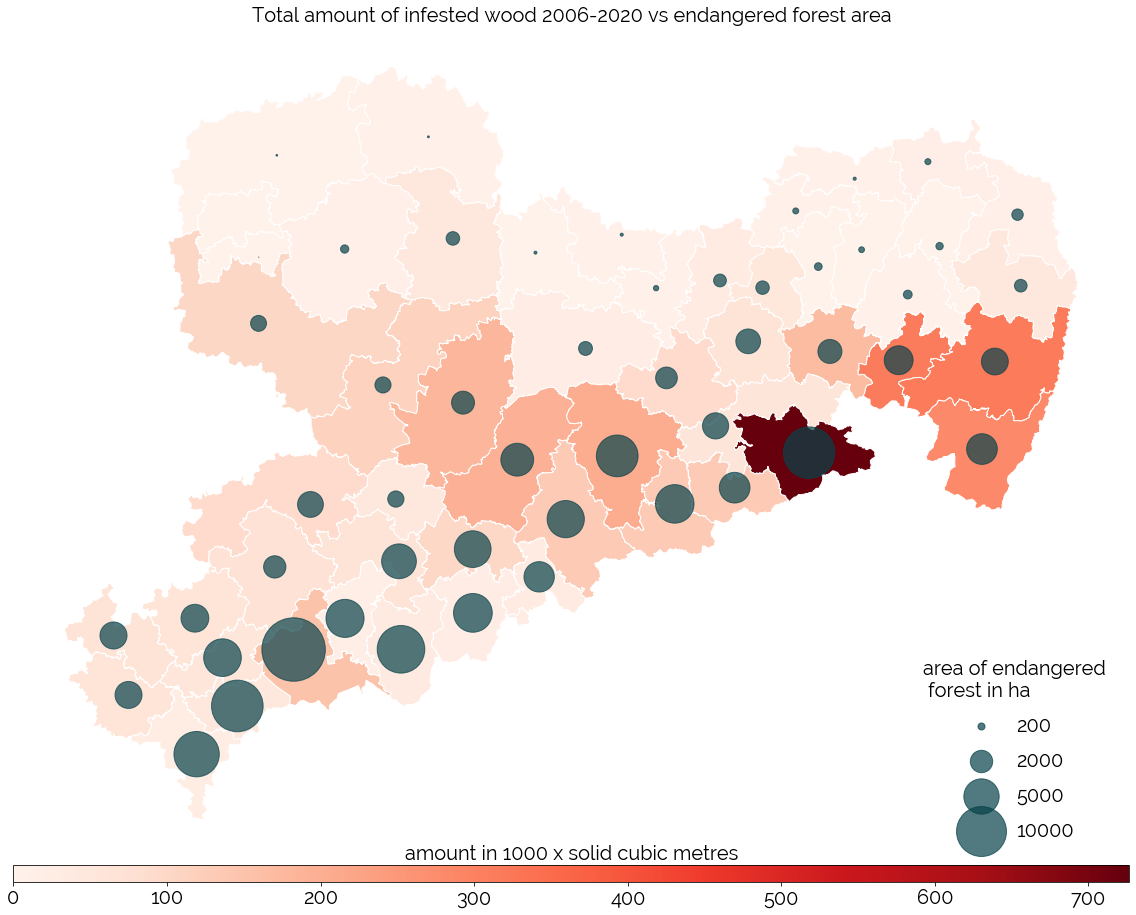

In [6]:
# plot a chloropleth map for the total observations of infested wood in 
# the forestry districts plus a bubble map for the endangered forest area

# read shapefile with geodata (geometry needed for map, not in dataset)
# we first 52 rows are needed since these are the current districts
districts_gdf = gpd.read_file(
    r'forestry_districts.shp', 
    encoding='utf-8'
).loc[:52]

# name columns according to first notebook
districts_gdf.columns = [
    'county_name', 'fdist_name', 'fdist_id', 'area_nse', 'area_nsne', 
    'area_se', 'area_sne', 'area_fdist', 'endangered_forest_density', 
    'centroid_xcoord', 'centroid_ycoord', 'geometry'
]

# get the total amount of damaged wood for every forestry district
total_infested_wood = data.groupby('fdist_name')['infested_wood'].sum()

# make this information on total amount of damaged wood a column 
# in the geodataframe 
districts_gdf['total_infested_wood'] = [
    total_infested_wood.loc[
        total_infested_wood.index == district_name
    ].item()/1000 for district_name in districts_gdf['fdist_name']
]

# create column with total amount of endangered forest area 
# (add private and state owned together)
# scale by a factor to get the nice bubble sizes, 
# later scale the same amount in legend
area_scale = .25
districts_gdf['area_endangered'] = (
    districts_gdf['area_nse'] + districts_gdf['area_se']
) * area_scale

# create figure
fig, ax = plt.subplots(figsize=(20,20))

# plot title
plt.title(
    'Total amount of infested wood 2006-2020 vs endangered forest area', 
    fontdict={'fontsize': 20}
)

# custom legend for colormap requires locateable axis
divider = make_axes_locatable(ax)
cax = divider.append_axes(
    # colormap parameters
    "bottom", size="2%", pad=0.1 
) 

# plot the forestry districts chloropleth map
districts_gdf.plot(
    ax=ax, column='total_infested_wood', 
    legend=True, cax=cax, legend_kwds={'orientation': 'horizontal'},
    edgecolor='white', linewidth=1,
    cmap=truncate_colormap(plt.get_cmap('Reds'), 0.02, 1)
)

# colormap legend title and tick fontsize
plt.title(
    'amount in 1000 x solid cubic metres', 
    fontdict={'fontsize': 20}
)
cax.tick_params(labelsize=20)

# add bubble map 
# calculate representative points from polygons (used as bubble location)
gdf_points = districts_gdf.copy()
gdf_points['geometry'] = gdf_points['geometry'].representative_point()

# plot bubbles
gdf_points.plot(
    ax=ax, 
    color='#07424A', 
    markersize='area_endangered', 
    alpha=.7, 
    categorical=False, 
    legend=True
)

# make some dummy points at 0,0 
# to use as custom handles in bubble plot legend
ax.scatter([0], [0], c='#07424A', alpha=.7, s=200*area_scale,
            label='200')
ax.scatter([0], [0], c='#07424A', alpha=.7, s=2000*area_scale,
            label='2000')
ax.scatter([0], [0], c='#07424A', alpha=.7, s=5000*area_scale,
            label='5000')
ax.scatter([0], [0], c='#07424A', alpha=.7, s=10000*area_scale,
            label='10000')

# add bubble map legend
ax.legend(
    scatterpoints=1, 
    frameon=True,
    labelspacing=.8, 
    loc='lower right', 
    fontsize=20, 
    edgecolor='white',
    bbox_to_anchor=(1,0), 
    title_fontsize=20, 
    title='area of endangered \n forest in ha'
);

# x and y axis settings
ax.set_xlim(267100.4013500002, 514160.39804999967);
ax.set_ylim(5552730.938154999, 5736554.970745001);
ax.axis('off');

To get better understanding of these amounts, show the top and bottom values to complement the plot:

In [7]:
# first restore the original amount of damaged wood and 
# endangered forest area (revert any scaling)
districts_gdf['area_endangered'] = districts_gdf[
    'area_endangered'
] / area_scale

districts_gdf['total_infested_wood'] = districts_gdf[
    'total_infested_wood'
] * 1000

# get top and bottom rows regarding amount of damaged wood
district_info = districts_gdf[[
    'county_name', 'fdist_name', 'total_infested_wood', 'area_endangered'
]].sort_values('total_infested_wood', 
               ascending=False)

district_info.head(4).append(district_info.tail(4))

county_name fdist_name  total_infested_wood  \
38  Sächsische Schweiz-Osterzgebirge    Sebnitz            726589.19   
42                           Görlitz      Löbau            317423.00   
20                           Bautzen  Cunewalde            314677.26   
19                           Görlitz     Zittau            283009.66   
6                        Nordsachsen  Delitzsch               313.14   
14                            Meißen     M West                85.00   
48          Kreisfreie Stadt Leipzig  Connewitz                 0.00   
49          Kreisfreie Stadt Leipzig   Leutzsch                 0.00   

    area_endangered  
38         10611.80  
42          2879.04  
20          3332.18  
19          3772.59  
6             11.40  
14            36.16  
48             0.54  
49             0.00

The first thing that catches the eye while looking at the map is the dark red shade of the *Sebnitz* district. The amount of total observed infested wood far exceeds that of the other forestry districts. All in all some correlation exists between the amount of damaged wood and the area of endangered forest. However there are apparently other factors at play. For example although the area of endangered forest of the forestry districts of the *Görlitz* county in the east and the *Erzgebirgskreis* in the central south are comparable, *Görlitz* has much higher amounts of damaged wood.

## 2.3 The role of endangered forest area

Let's take a closer look at relationship between area of endangered forest and amount of damaged wood. 

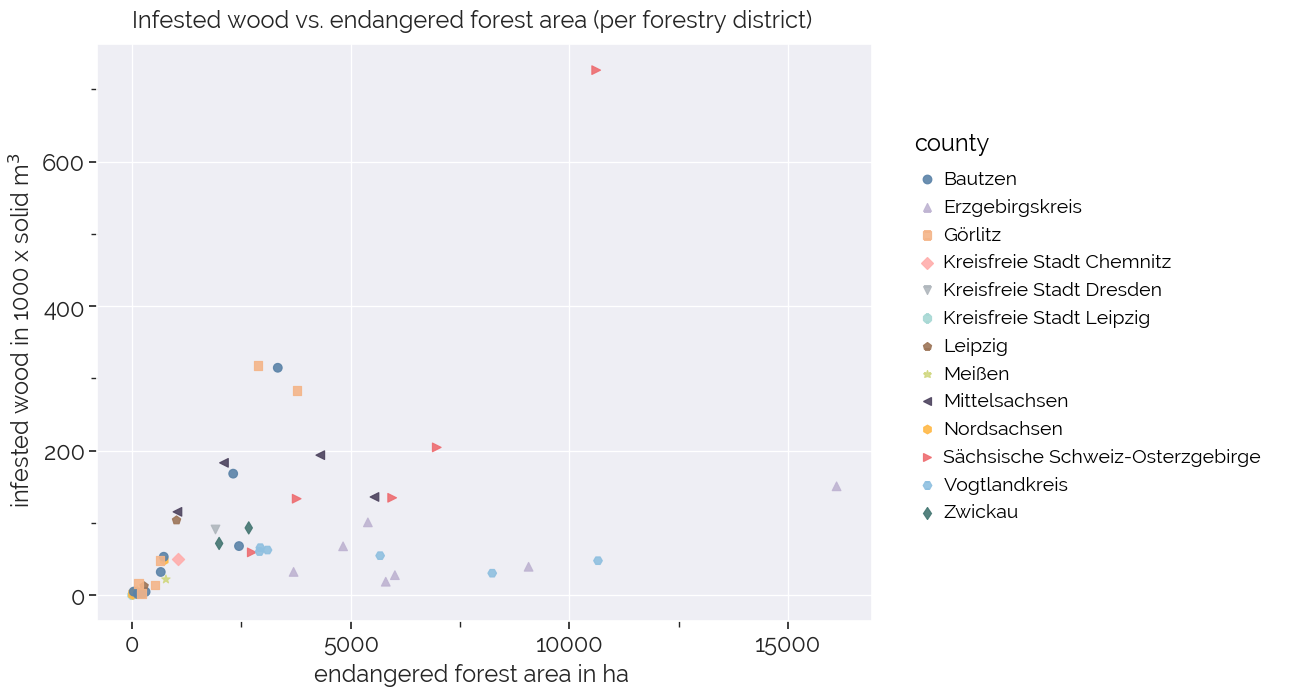

In [8]:
# make a scatterplot: infested wood vs endangered
# (one point per forestry district)

(p9.ggplot(districts_gdf, p9.aes(
    'area_endangered' , 'total_infested_wood/1000', color='county_name')) 
 + p9.geom_point(p9.aes(shape='county_name'), size=3, alpha=.9)
 + p9.scale_color_manual(mycolors[:13][::-1], name='county')
 + p9.scale_shape_manual([
     'o', '^', 's', 'D', 'v', '8', 'p', '*', '<', 'h', '>', 'H', 'd'
 ], name='county')
 + p9.ggtitle('Infested wood vs. endangered forest area (per forestry district)')
 + p9.xlab('endangered forest area in ha') 
 + p9.ylab('infested wood in 1000 x solid m$^3$')
 + mytheme
).draw();

Considering both plots it seems plausible that some correlation exists between the area of endangered forest and the target variable. From the second plot one can additionally conclude that every county seems to have its own distinct coefficient that roughly describes the strength of this relationship. 

## 2.4 Historic development of the bark beetle population

Now that the local context was examined, let's get an overview of the chronological infestation development. For this, we can use the timestamp feature of our dataset.

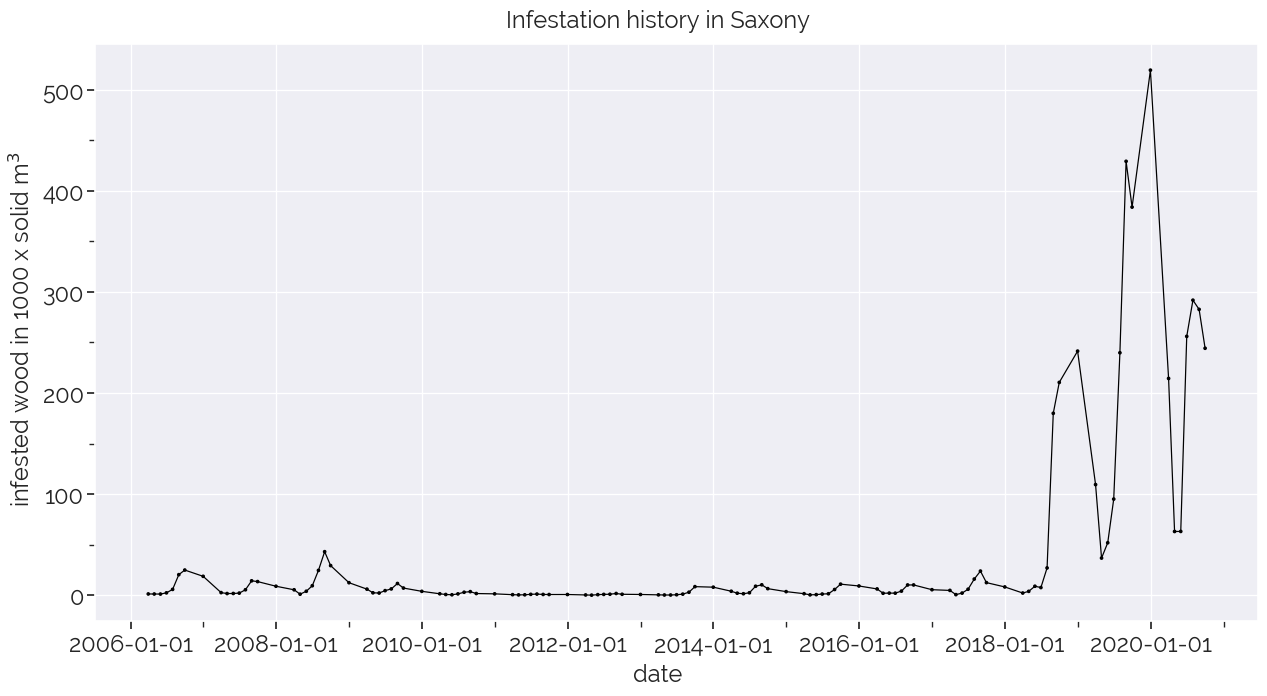

In [9]:
# add together all observations of every timestamp post 2005
inf_sum = data[data['year'] > 2005].groupby('timestamp')['infested_wood'].sum()

# plot inf_sum on timeline
(p9.ggplot(p9.aes(inf_sum.index, inf_sum.values / 1000)) 
 + p9.geom_line()
 + p9.geom_point(size=.5)
 + p9.ggtitle('Infestation history in Saxony')
 + p9.xlab('date') + p9.ylab('infested wood in 1000 x solid m$^3$')
 + mythemewide
).draw();

From this plot the seriousness of the current situation is evident. The infestation (and thus resulting forest dieback) that took place during the last three years is on a completely different level than whatever came before. Even the at the time worrying infestation from 2008 is dwarfed by the amount of infested wood post 2017. 

Since the seasonal nature of the infestation is difficult to gleam from this graphic, recreate the plot with a logarithmically scaled y-axis.

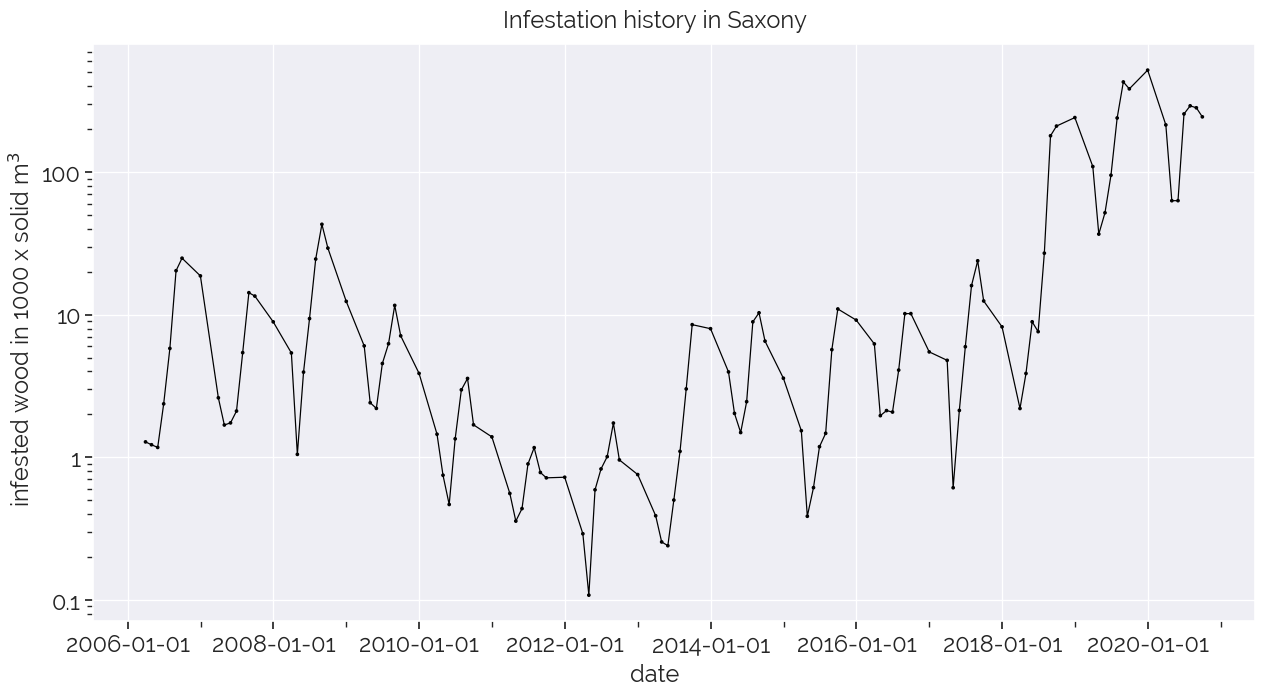

In [10]:
# plot inf_sum on timeline with logarithmic y-axis
(p9.ggplot(p9.aes(inf_sum.index, inf_sum.values / 1000)) 
 + p9.geom_line()
 + p9.geom_point(size=.5)
 + p9.scale_y_log10()
 + p9.ggtitle('Infestation history in Saxony')
 + p9.xlab('date') + p9.ylab('infested wood in 1000 x solid m$^3$')
 + mythemewide
).draw();

In that plot the yearly highs are more distinguishable. In the early years they seem to occur in August and September. In the later years, the infested wood peaks during the summarized months of October-December (most likely because they **are** summarized, otherwise one could assume the peak would also be September). The lowest values exist in April, but again the summarization of three months into one just before April makes it difficult to draw definite conclusions. It is however evident that there is a seasonal component/cycle to the infestation. All in all the years with the highest amount of infested wood are (in that order) 2019, 2020, 2018 (followed by 2008) and the years with the lowest total amount of infested wood are 2011, 2012 and 2010. We will keep this in mind for the investigation of meteorological parameters.

In addition to the total amount of infested wood, an ancillary plot with the amount of infested wood, aggregated for each of the 13 counties, is created. 

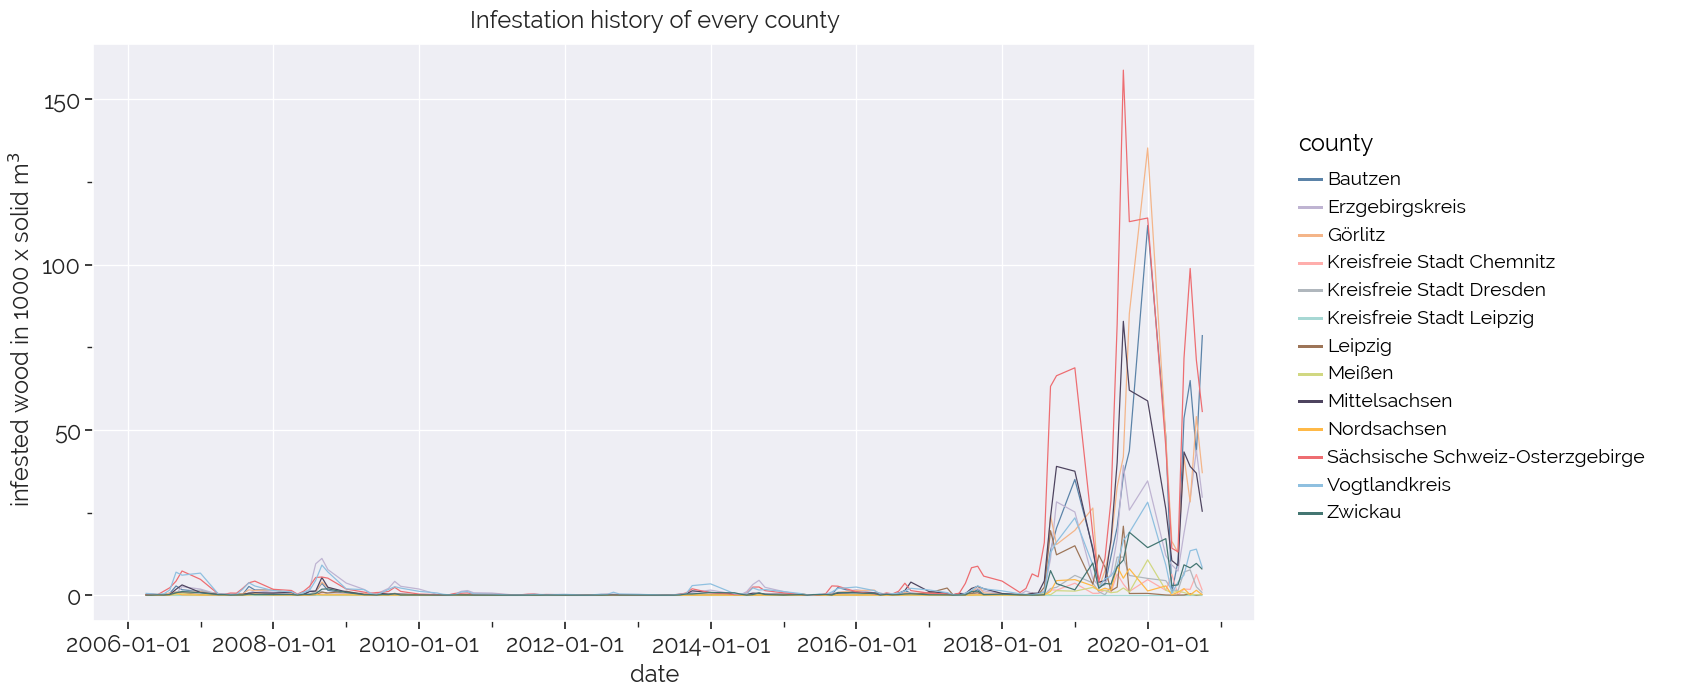

In [11]:
# add together data after 2005, grouped by county and timestamp
inf_sum_c = data[data['year'] > 2005].groupby(['timestamp','county_name'])[
    'infested_wood'
].sum().reset_index()

(p9.ggplot(inf_sum_c, p9.aes('timestamp', 'infested_wood / 1000', color='county_name'))
 + p9.geom_line()
 + p9.scale_color_manual(mycolors[:13][::-1], name='county')
 + p9.ggtitle('Infestation history of every county')
 + p9.xlab('date') + p9.ylab('infested wood in 1000 x solid m$^3$')
 + mythemewide
).draw();

For visibility and comprehensibility reasons, the same plot is recreated with only the observations pre 2018.

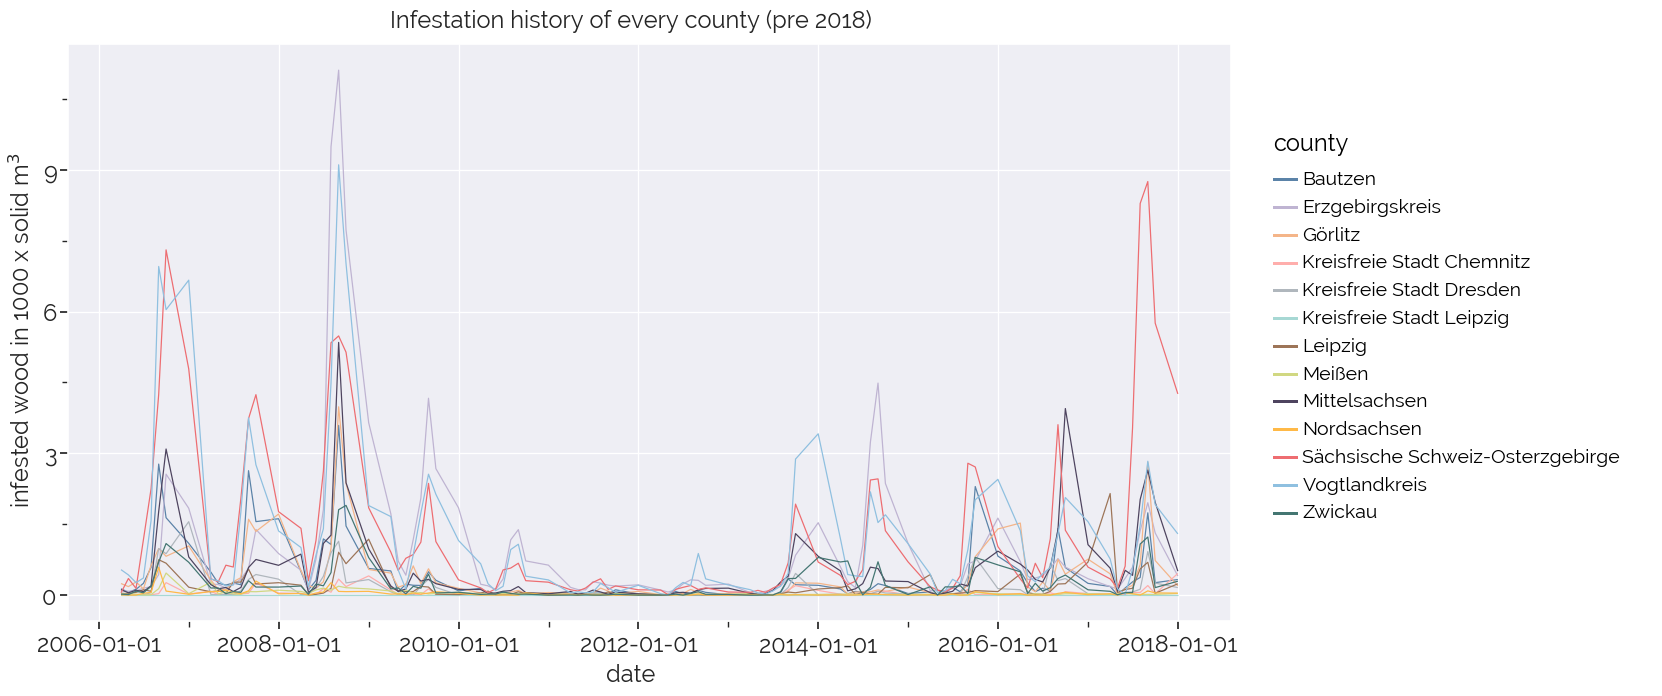

In [12]:
(p9.ggplot(inf_sum_c[
    inf_sum_c['timestamp'] < pd.Timestamp('2018-01-01')
], p9.aes('timestamp', 'infested_wood/1000', color='county_name')) 
 + p9.geom_line()
 + p9.ggtitle('Infestation history of every county (pre 2018)')
 + p9.xlab('date') + p9.ylab('infested wood in 1000 x solid m$^3$')
 + p9.scale_color_manual(mycolors[:13][::-1], name='county')
 + mythemewide
).draw();

The plot reiterates what was learned so far. 2008 was the previously highest year regarding the amount of infested wood, while the years 2010 - 2012 were the lowest years in that respect. The chronologocal plots correspond with the map and scatterplot, in that the county *Sächsische Schweiz-Osterzgebirge*, where the forestry district *Sebnitz* lies, consistently is among the top counties with regards to the amount of infested wood. On the other hand, the county *Erzgebirgskreis* has the greatest peaks of any county in 2008, 2009 and 2014, but is affected less in the years from 2018 onwards and thus lies behind in total amount of infested wood (see scatterplot). This is interesting, because it does have among the greatest area of endangered forest. We will keep this in mind for the analysis of meteorological parameters. 

As a reminder, a map of Saxony with all counties and forestry districts can be found in the repository.

# 3 Target variable distribution

The way we padded the dataset with rows containing zero infested wood during data aggregation is reason to assume a skewed target variable distribution in the dataset. Let's see how some stats on the distribution within the dataframe rows.

In [13]:
# number of rows with zero infested wood
zero_rows = data[data['infested_wood'] == 0].shape[0]

# number of rows with infested wood greater than zero and lower than 100
zero_to_hundred = data[
    (data['infested_wood']>0) & (data['infested_wood']<=100)
].shape[0]

# ten highest observations of infested wood
top_ten = data.sort_values(
    'infested_wood', ascending=False
)['infested_wood'].values[:10]                  

# print results
print(f'There are {data.shape[0]} rows in the dataset.\n')                 
print(f'Of these rows, {zero_rows} contain an infested wood amount of zero.')
print(f'Additionally, there are {zero_to_hundred} rows with an amount',
      f'of infested wood between zero and 100 solid cubic metres.')
print(f'On the other hand, the top values of infested wood are {top_ten}')

There are 13484 rows in the dataset.

Of these rows, 6640 contain an infested wood amount of zero.
Additionally, there are 4552 rows with an amount of infested wood between zero and 100 solid cubic metres.
On the other hand, the top values of infested wood are [114300.  90065.  78364.  60813.  60000.  54900.  51800.  46304.  44333.
  43130.]


These results indicate a skewed distribution. We plot the distribution in a density plot. Due to the results that were just printed, the x-axis will be scaled logarithmically (log1p-transformation).

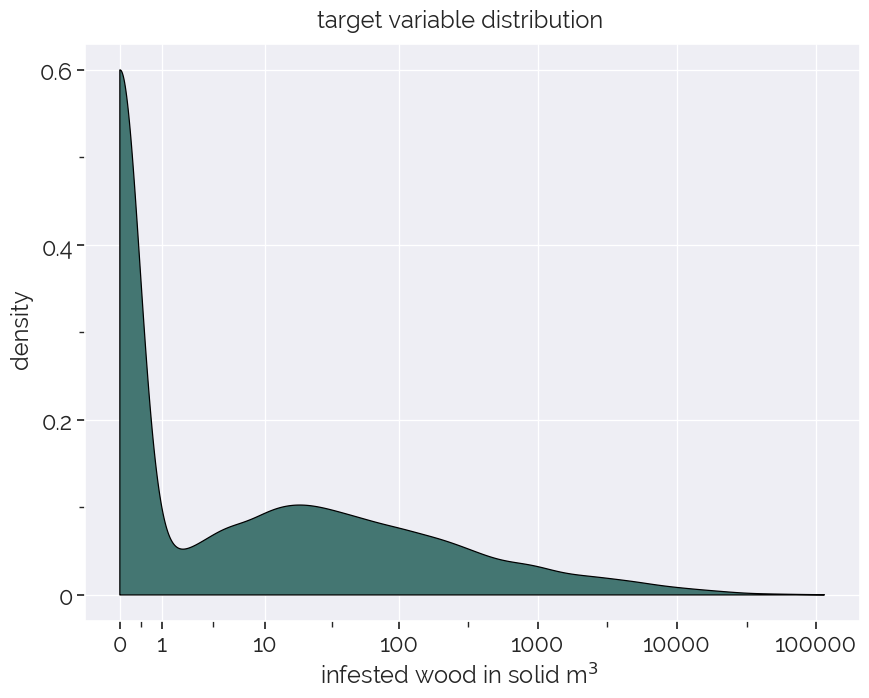

In [14]:
# density plot of target variable distribution
(p9.ggplot(data, p9.aes(x='infested_wood')) 
 + p9.geom_density(fill=mycolors[0])
 + p9.scale_x_continuous(trans="log1p", 
                         breaks=[0, 1, 10, 100, 1000, 10000, 100000])
 + p9.ggtitle('target variable distribution')
 + p9.xlab('infested wood in solid m$^3$') 
 + p9.ylab('density')
 + mytheme
).draw();

As expected, we get a left-skewed distribution. Most target variable values lie between zero and one. Interestingly, the plot contains two maxima, almost as if there are two underlying distributions. A different view of the same distribution is provided by a histogram, but this time with the y-axis logarithmically scaled, as the 'Infestation history in Saxony' gave a good understanding of the data with this transformation. The binwidth of the histogram is 2000 solid m$^3$.

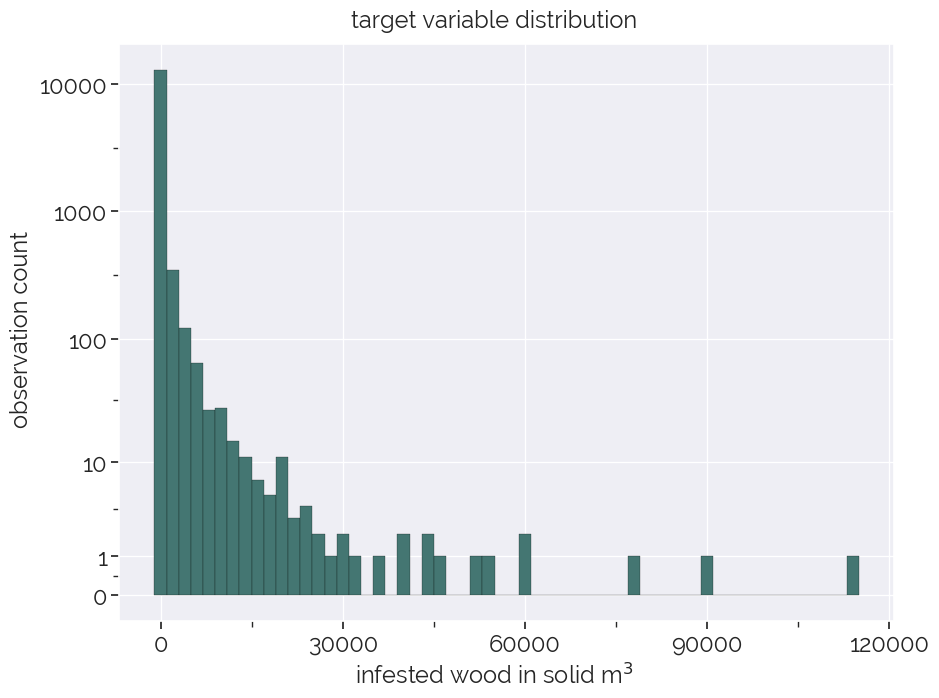

In [15]:
# histogram of target variable distribution
(p9.ggplot(data, p9.aes(x='infested_wood')) 
 + p9.geom_histogram(binwidth=2000, fill=mycolors[0], color='black', size=.1)
 + p9.scale_y_continuous(trans="log1p", breaks=[0, 1, 10, 100, 1000, 10000])
 + p9.ggtitle('target variable distribution')
 + p9.xlab('infested wood in solid m$^3$') 
 + p9.ylab('observation count')
 + mytheme
).draw();

As the x-axis is no longer logarithmically scaled, the first bin with a width of 2000 solid m$^3$ swallows the two different distributions of the last plot, so that they are no longer visible. On the other hand, in the second plot the top ten single values of infested wood are distictly visible, which was not the case in the density plot. 

The combination of these two plots highlights a pecularity in the dataset. If a regression model is to reduce its prediction error (loss function), then the imbalance in the data may cause the prediction either favour the many small values (always predict lower values for the later years) or the few extremely large values (either predicting too much infested wood for the many districts with almost no infested wood and the years pre 2018 OR just ignoring them). This also suggests that the model loss should be carefully chosen. All in all, the plots promote a deeper understanding of the target variable observations

# 4 Meteorological features
## 4.1 Correlation matrix

There are 15 different meteorological parameters in the dataset. Based on the names some of them seem to be very similar, i.e. the total precipitation (RRU) and the corrected precipitation (RRK) or the wind velocity 10 metres above ground (FF1) and the wind speed on the beaufort scale (FFB). Even if that were not the case, a correlation matrix can spot problematic relationships between the features and enable us to choose meaningful predictors. So as a first examination of the climate based features, we plot a correlation matrix. To make the correlations obvious at a glance, we choose a diverging color palette and make the point size dependant on the absolute correlation coefficiant.

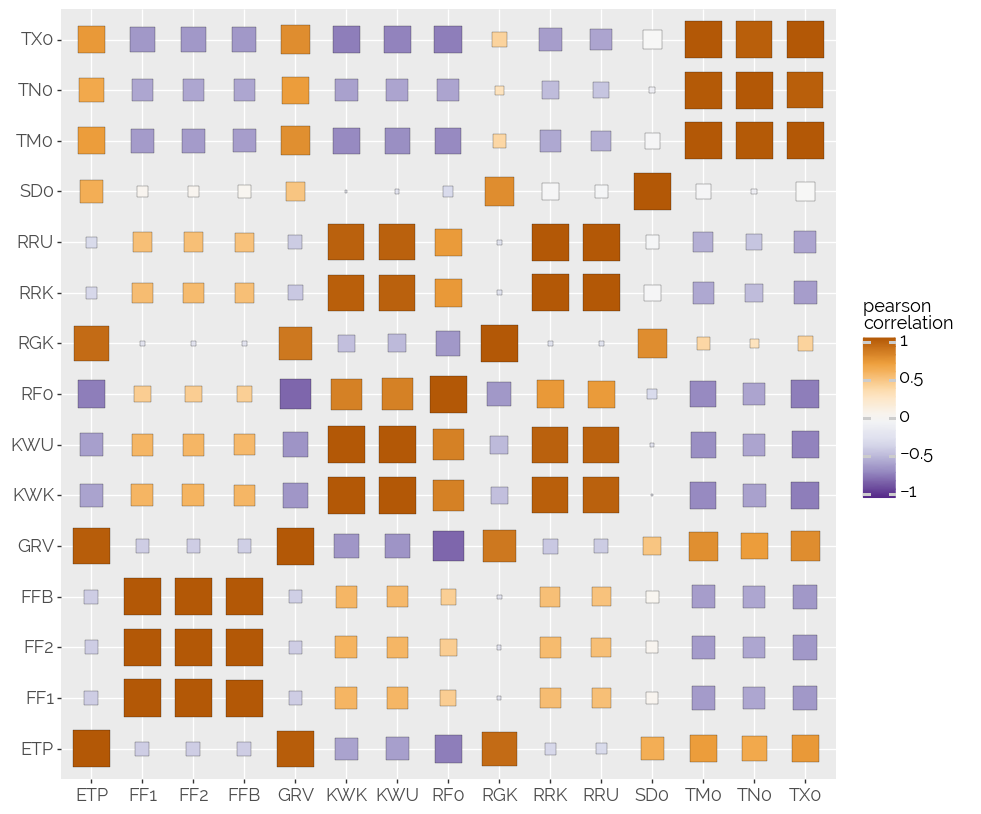

In [16]:
# define function for correlation heatmap (correlation matrix)
def heatmap(x, y, size, color):
    '''
    This function will plot a correlation heatmapof the input variables.
    inputs:
        - x, y: two array-likes with all combinations of feature labels
        - size: array-like with the absolute of the 
          pearson correlation coefficient 
        - color: array-like with the pearson correlation coefficient 
    Together x, y, size and color represent data in long format.
    '''
    # set figure size
    p9.options.figure_size = (10,10)
    
    # make plot
    (p9.ggplot(p9.aes(x,y, size=size, fill=color, group=1))
    + p9.geom_point(shape='s', stroke=.1)
    + p9.scale_fill_distiller(
        type='div',
        name='pearson \ncorrelation\n', 
        limits=[-1,1],
        palette=4)
     + p9.scale_size_continuous(range=[-10,15], limits=[0,1], guide=False)
     + p9.xlab('') + p9.ylab('')
     + p9.theme(text= p9.element_text(size=13, family='sans-serif'))
    ).draw();

    
# choose features for this plot
columns =  ['TX0', 'TM0', 'TN0', 'RF0', 'SD0', 'RRU', 'RRK', 'FF1', 
            'FF2', 'FFB', 'RGK', 'ETP', 'GRV', 'KWU', 'KWK']

# calculate pearson correlation
corr = data[columns].corr()

# Unpivot the dataframe, so we can get pair of arrays for x and y 
# (long format)
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']

# plot heatmap
heatmap( 
    x=corr['x'], 
    y=corr['y'], 
    size=corr['value'].abs(), 
    color = corr['value']
)

The most striking, unambigous positive correlations exist between:
* The minimum temperature (TN0), mean temperature (TM0) and maximum temperature (TX0). Although they technically are different metrics, the strength of the correlation implies that during model training, we can use them interchangeably, since after scaling they might as well be the same metric. In the following preoceedings, only the mean temperature will be explored further.
* The wind velocity 10 metres above ground (FF1), the mean wind velocity 2 metres above ground (FF2) and the wind speed on the beaufort scale (FFB). All of these are measuring the wind intensity. The strong correlation is still somewhat unexpected, as the beafort scale does not rely on exact measurements but instead on observed conditions and thus is not an exact or an objective scale. Nevertheless, in future, only the wind velocity 10 metres above ground will be taken into account. 
* The total precipitation (RRU) and corrected total precipitation (RRK). The method of correcting systematic errors of the measuring device and installation location such as wetting/evaporation losses does not seem to change the interrelation of the measurement values. In the following proceedings, only the coorected precipitation will be explored further.
* The waterbalance (KWU) and the corrected waterbalance (KWK). Same as above (precipitation is a parameter for waterbalance). In the following proceedings, only the corrected waterbalance will be taken into account.
* The potential evaporation (ETP) and the potential evapotranspiration (GRV). This is expected as evapration is one part of the evapotranspiration. In the following preoceedings, only the evapotranspiration will be explored further.

Based on the strong correlation of particular features, the following eight parameters will be explored further: TM0, RF0, SD0, RRK, FF1, RGK, GRV, KWK.
  

Moderate positive correlation exists between:
* Temperature (TM0) and evaporation (GRV). This corresponds to common knowlegde. Interestingly, the relationship between temperature (TM0) and evapotranspiration (ETP) is slightly smaller.
* Sunshine duration (SD0) and global irridiation (RGK). This behavior is to be expected, as a cloudy or rainy day will have a lower global irridiation than a sunny day.
* Corrected total precipitation (RRK) and relative humidity (RF0). Since precipitation is the main reason for higher humidities, this is also in line with common knowledge.

Moderate negative correlation exists between:
* Temperature (TM0) and wind velocity (FF1). Since strong winds often indicate a change in weather and appear as a precursor to thunderstorms and low pressure areas, which in turn bring with them a lower temperature, this in in line with our life experiences. 
* Temperature (TM0) and corrected waterbalance (KWK). Since high temperatures indicate direct sunshine and contribute to water evaporation, this correlation is also expected. In months with higher temperatures, a lower waterbalance seems likely.
* Temperature(TM0) and relative humidity (RF0). As with the above explanations, since rain and sunshine oppose each other, humidity and temperature also do to some degree. Of course the relationships are slightly different in summer and in winter, but the overall tendency remains.
* Global irridiation (RGK) and relative humidity (RF0). With a laymans understanding of the antagonistic relationship between sunny weather and heavy rain, and their effect on humidity, this relationsip can also be sufficiently explained.

Slighter positive and negative correlations still remain to be explored, however they all can be explained in accordance with the above statements. Even though the strongest, most impairing correlations were already eliminated, a further reduction of features might be necessary before model training to enable the model to make accurate predictions. 

## 4.2 Grasping the feature-target relationships

Let's take a look at the relationship between these parameters and the target variable. Since the goal is to only portray the influences of the meteorological paramters and not the influences that come with the respective forestry districts (forest area etc.), normalizing the target variable values for either counties or forestry districts is paramount. Otherwise these values will not show any discernable relationships in these plots. For example the values of *Sächsische Schweiz-Osterzgebirge* will always be monumentally higher than those of *Meißen*, no matter the slight temperature difference. In this first attempt we group by forestry districts.

As we already saw multiple times, logarithmic scaling is also required to get the many low and few extraoridinarily high target variable values (the differences in magnitude still exist after normalizing) in a mutual plot.

In [17]:
# for clarity regarding the variable names, create labeller functions
def mylabeller_units(var):
    label_dict = {
        'FFB': 'wind speed in bft',
        'GRV': 'pot. evapotranspiration in mm',
        'KWK': 'corrected waterbalance in mm',
        'RF0': 'relative humidity in %',
        'RGK': r'solar irridiation in kWhm$^-$$^2$',
        'RRK': 'corrected precipitation in mm',
        'SD0': 'sunshine duration in h',
        'TM0': 'mean temperature in $°$C',
    }
    return label_dict.get(var)

def mylabeller_names(var):
    label_dict = {
        'FFB': 'wind speed',
        'GRV': 'pot. evapotranspiration',
        'KWK': 'corrected waterbalance',
        'RF0': 'relative humidity',
        'RGK': 'solar irridiation',
        'RRK': 'corrected precipitation',
        'SD0': 'sunshine duration',
        'TM0': 'mean temperature',
    }    
    
    return label_dict.get(var)

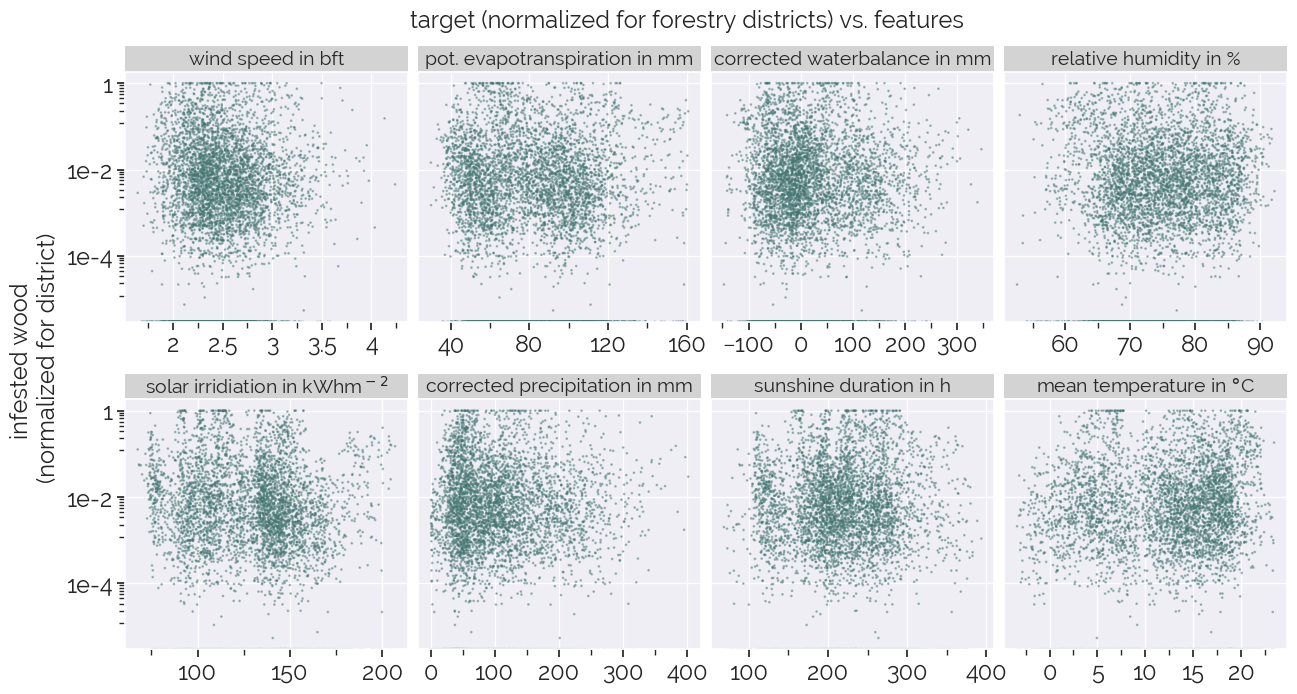

In [18]:
# initial graphic - grouped for forestry districts

# use a copied dataframe so transformations aren't applied to main dataset
# only take into account years with target variable observations
draw = data[(data['year'].isin(range(2006,2020)))].copy()

# group target variable by forestry district and timestamp, 
# aggregate data by summation
draw['infested_wood'] = draw.groupby(
    ['fdist_newname', 'timestamp']
)['infested_wood'].transform('sum')

# group features by forestry district and timestamp, calculate mean
for v in ['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK']:
    draw[v] = draw.groupby(['fdist_newname', 'timestamp'])[v].transform('mean')
draw.drop_duplicates(['fdist_newname', 'timestamp'], inplace=True)

# normalize target variable with minmax scaler
draw['infested_wood'] = draw.groupby('fdist_newname')[
    'infested_wood'
].transform(lambda x: minmax_scale(x))

# transform from wide to long format as plotnine likes tidy data
draw = pd.melt(
    draw, 
    id_vars=['infested_wood'], 
    value_vars=['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK']
)

# create plot
(p9.ggplot(p9.aes('value', 'infested_wood'), data=draw)
 + p9.geom_point(size=.1, alpha=.4, color=mycolors[0])
 + p9.facet_wrap('variable', scales='free_x', ncol=4, labeller=mylabeller_units)
 + p9.scale_y_log10()
 + p9.ggtitle('target (normalized for forestry districts) vs. features')
 + p9.xlab('') + p9.ylab('infested wood \n(normalized for district)')
 + mythemewide
).draw();

Despite the normalization as well as the scaling, meaningful relationships are not apparent in this plot. In a second attempt, the plot is recreated with reduced clutter by grouping by county instead of forestry district. As a consequence, the number of individual points is diminished. There is a slight problem with this approach however: The mean of climate parameters of every district in a county does not evaluate to the mean of the climate paramter when calculated for the county itself. This is because the forestry districts vary by area. The get the correct value for the mean of a parameter in the respective county, the aggreation of raster data would need to be done again for every county border. Instead, a workaround is used. When calculating the county mean, we take into account the respective forestry district area as a weight, then divide by the total county area. This way, the correct values area approxiamted. In additio,n the normalization with a minmax scaler is also done for the features (relative to all parameter values in the county). 

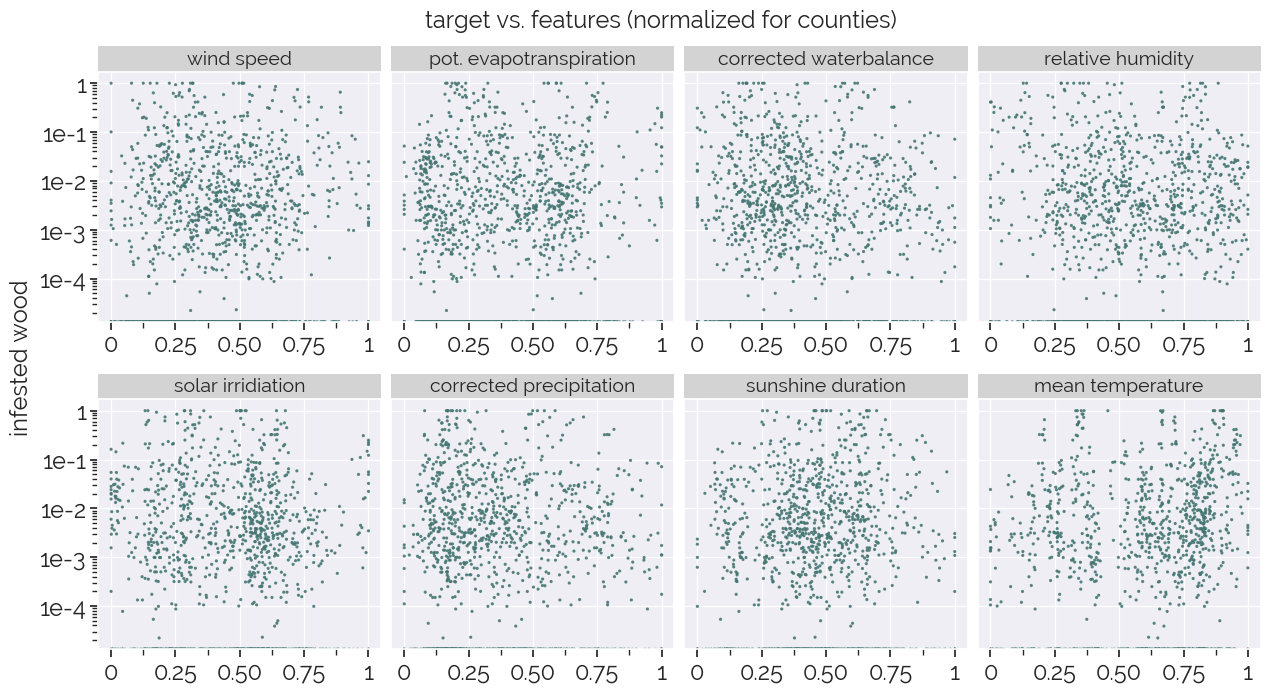

In [20]:
# second graphic - grouped for counties

# use a copied dataframe so transformations aren't applied to main dataset
# only take into account years with target variable observations
draw = data[(data['year'].isin(range(2006,2020)))].copy()

# group target variable by county and timestamp, aggregate data by summation
draw['infested_wood'] = draw.groupby(
    ['fdist_newname', 'timestamp']
)['infested_wood'].transform('sum')

for v in ['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK']:
    # multiply all values by forestry district area (weight)
    draw[v] = draw[v] * draw['area_fdist']
    
    # sum up weighted target variable 
    draw[v] = draw.groupby(['county_name', 'timestamp'])[v].transform('sum')
    
    # sum up all forestry district areas in respective counties
    draw['area_county'] = draw.groupby(['county_name', 'timestamp'])[
        'area_fdist'
    ].transform('sum')
    
    # technically area_county has the area multiplied by 2
    # since there are two observations per forestry district
    # (non-state- and state-owned forest)
    #
    # the same is true for the target variable however so for the 
    # fraction this does not matter
    draw[v] = draw[[v, 'area_county']].apply(lambda x: x[0]/x[1], axis=1)
    
    # scale minmax for county
    draw[v] = draw.groupby('county_name')[v].transform(
        lambda x: minmax_scale(x)
    )

# drop duplicates
draw.drop_duplicates(['county_name', 'timestamp'], inplace=True)

# normalize target variable with minmax scaler
draw['infested_wood'] = draw.groupby('county_name')[
    'infested_wood'
].transform(lambda x: minmax_scale(x))

# transform from wide to long format as plotnine likes tidy data
draw = pd.melt(
    draw, 
    id_vars=['infested_wood'], 
    value_vars=['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK'])

# plot
(p9.ggplot(p9.aes('value', 'infested_wood'), data=draw)
 + p9.geom_point(size=.3, alpha=.8, color=mycolors[0])
 + p9.facet_wrap('variable', scales='free_x', ncol=4, labeller=mylabeller_names)
 + p9.scale_y_log10()
 + p9.ggtitle('target vs. features (normalized for counties)')
 + p9.xlab('') + p9.ylab('infested wood')
 + mythemewide
).draw();

I this second plot, meaningful relations are still not apparent. The aggregation of counties does improve visibility though. Before we continue improving on the concept of these plots, let's take a step back. 

Based on the beetle biology, one can assume that some meteorological parameters have different influences in winter than in summer. Below temperatures of 8 °C, the beetles lapse into torpor and thus are unable to reproduce or infest new trees. Taking this into consideration, some features such as precipitation might have less influence on the target variable in winter than in summer. Maybe some features affect the beetle antagonists or the spruce tree defense system during winter in different ways than they affect the beetles themselves. This in turn would introduce new effects, that might be superimposing each other. All in all, the seperation into winter and summer months is a lead worth investigating.

In the following section, we track the chronological development of the meteorological parameters, separated into winter and summer semesters. One 'winter' in this context is the last three months of a given year and the next three months of the subsequent year (so for example the winter 2008/2009, not the six winter months of 2008, which would be chronologically seperated by the summer between them). Keep in mind, the three years with the highest target variable are 2018, 2019 and 2008, while the years with the lowest target variable are 2010, 2011 and 2012. 

We first create a function that is able to plot one individual chronological boxplot and then call it for the respective meteorological features.

In [24]:
# function that makes a chronological boxplot of a parameter, 
# separated into winter and summer months
def climate_boxplot(param, aggfunc, data=data):
    '''
    This function separates one feature of a given dataframe into subsequent 
    summers and winters, aggregates them in a specified way and creates a 
    chronological boxplot with them.
    
    inputs:
        - param: the name of the feature as a string
        - aggfunct: the aggreagation funciton as a string
        . data: the dataset
    '''
    # select only data from winter 2005/2006 untill winter 2019/2020
    draw = data[data['timestamp'].isin(
        pd.date_range(start='2005-10-01', end='2019-10-01', freq='M')
    )].copy()
    
    # make a dummy feature that distinguishes winter and summer
    # winter = months 10,11,12,01,02,03; summer = months 4,5,6,7,8,9
    draw['season'] = draw['timestamp'].map(
        lambda x: 'winter' if x.month not in range(4,10) else 'summer'
    )
    
    # logically group winters together in 'winteryear' column 
    #
    # winter at end of preceeding year should be grouped with 
    # winter at beginning of subsequent year
    # for example winter 2007/2008 should go 'in between' 
    # summer 2007 and summer 2008
    #
    # take both observations and map them to the preceeding year
    draw['winteryear'] = draw[['year', 'timestamp']].apply(
        lambda x: x[0] if x[1].month != 3 else x[0]-1, axis=1
    )
    
    # every data point is aggregated for the year and forestry district
    draw[param] = draw.groupby(
        ['fdist_newname', 'season', 'winteryear']
    )[param].transform(aggfunc).copy()
    
    # drop duplicates
    draw.drop_duplicates(
        ['winteryear', 'season', 'fdist_newname'], inplace=True
    )
    
    #plot
    (p9.ggplot(p9.aes('factor(winteryear)', 
                      param, fill='factor(season)'), 
               data=draw)
     + p9.geom_boxplot(data=draw[draw['season']=='summer'], width=.35)
     + p9.geom_boxplot(data=draw[draw['season']=='winter'], width=.35,
                       # arrange winters exactly between summers
                       position=p9.position_nudge(x=0.5)) 
     + p9.scale_x_discrete(expand=(0, 0, 0, 1))
     + p9.scale_fill_manual(mycolors[1:3], name='season')
     + p9.xlab('year') + p9.ylab(mylabeller_units(param))
     + mythemewide
    ).draw();

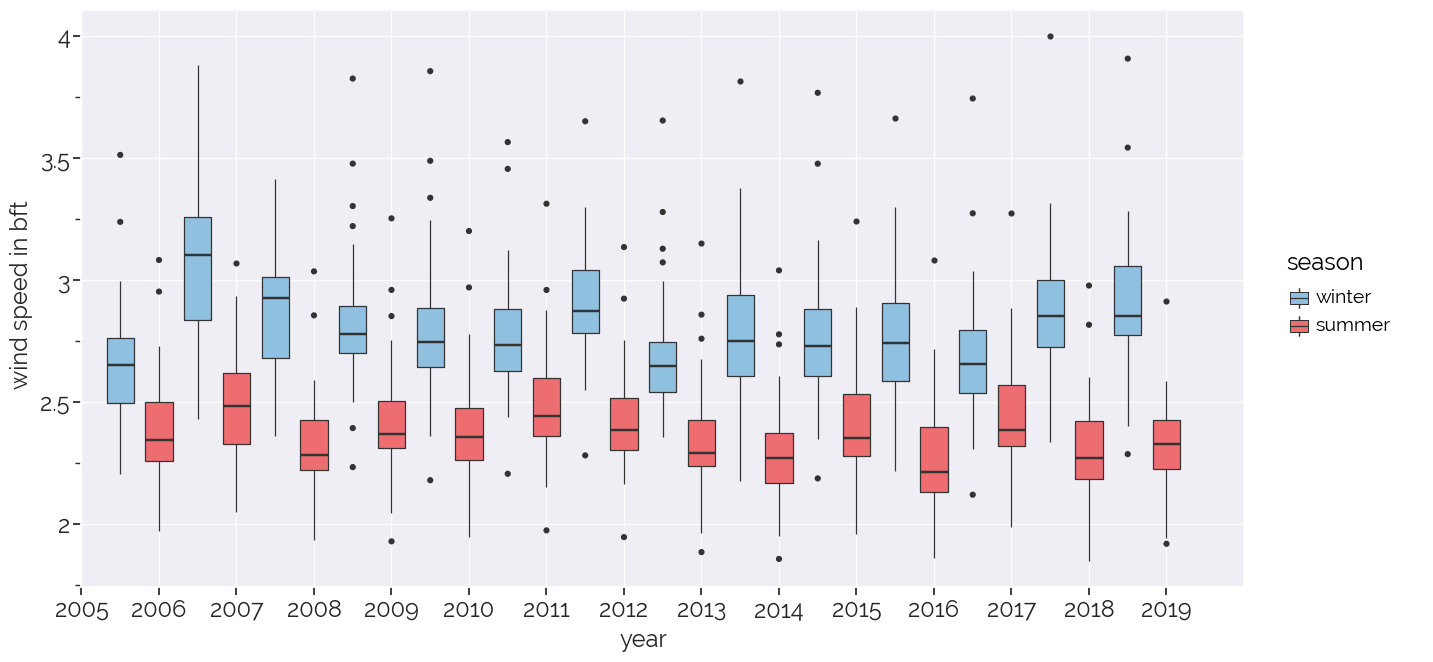

In [25]:
climate_boxplot('FFB', 'mean') # wind speed in bft

In the case of wind speed the separation of seasons does not yield reamrkable results. Windspeed may be correlated with thunderstorms and 'bad weather' in general, but on a semi-annual basis this effect gets drownded in noise. The outlier years are not prominently represented in this plot. One thing that maybe influnced by wind speed on this timescale is windfall/demolition wood, which in turn could be an influnce of the target variabel. But even then, the windspeed itself is likely not needed as a feature during model training.  

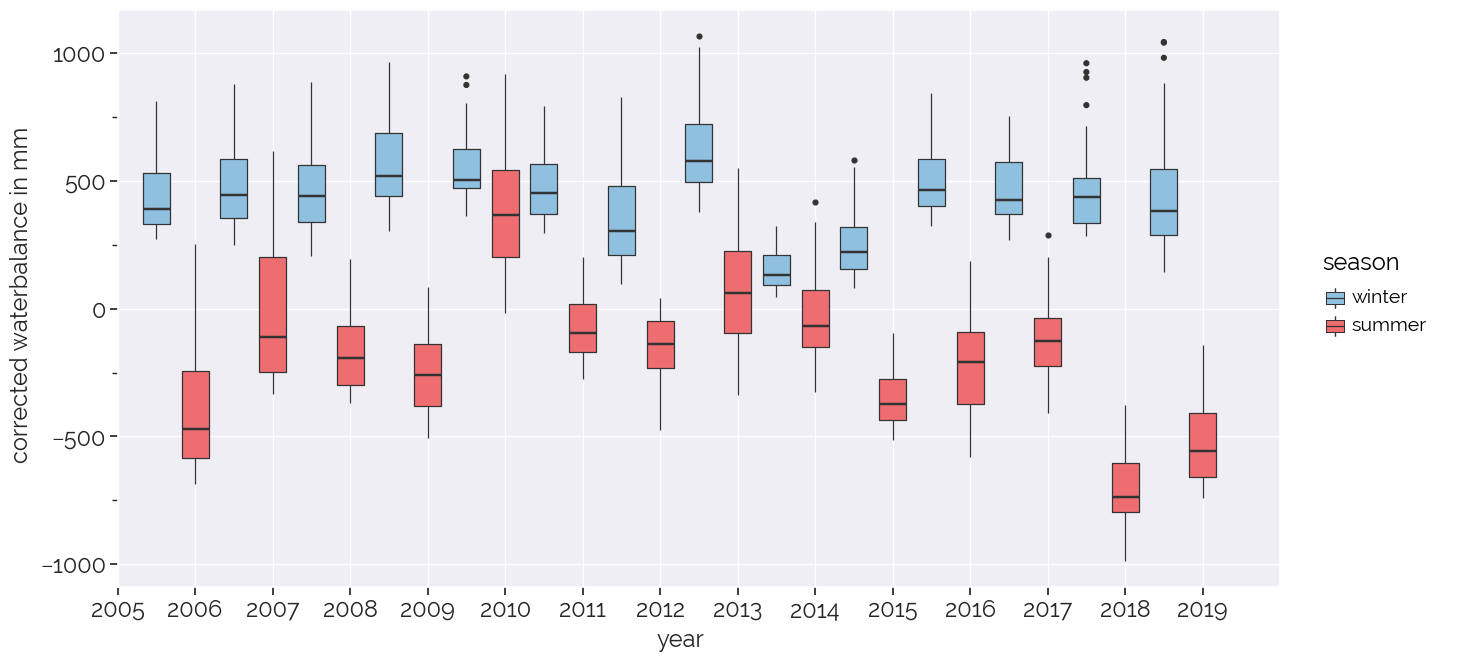

In [26]:
climate_boxplot('KWK', 'sum') # corrected waterbalance (precipitation - evapotranspiration)

In this second boxplot for the corrected waterbalance, a difference between summer and winter months is clearly apparent. For the summer boxes, the critical years of 2018 and 2019 distictly stand out as the driest on record, while the first summer of the years with the meekest infestation (2010) had the visibly highest corrected waterbalance. During winter, these years do not stand out at all and there is no correlation with the amount of infested wood of the years. Therefor, it may be practical, to exclude winter months in the climate parameter analysis.

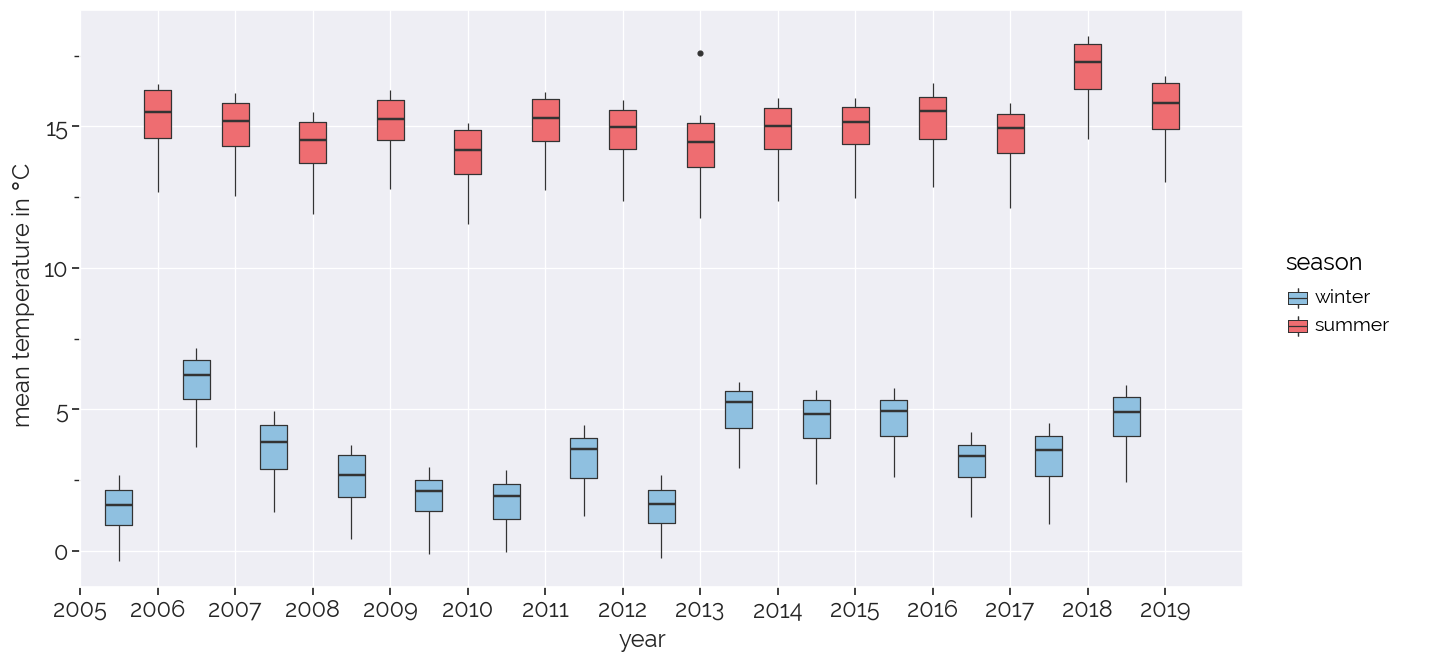

In [27]:
climate_boxplot('TM0', 'mean') # mean temperature

For the temperature plot, the summers of 2018 and 2019 are also distict as the hottest on record, while 2010 was the coldest. Winter, again, has a different order of precedence, although this time it is not too dissimilar.

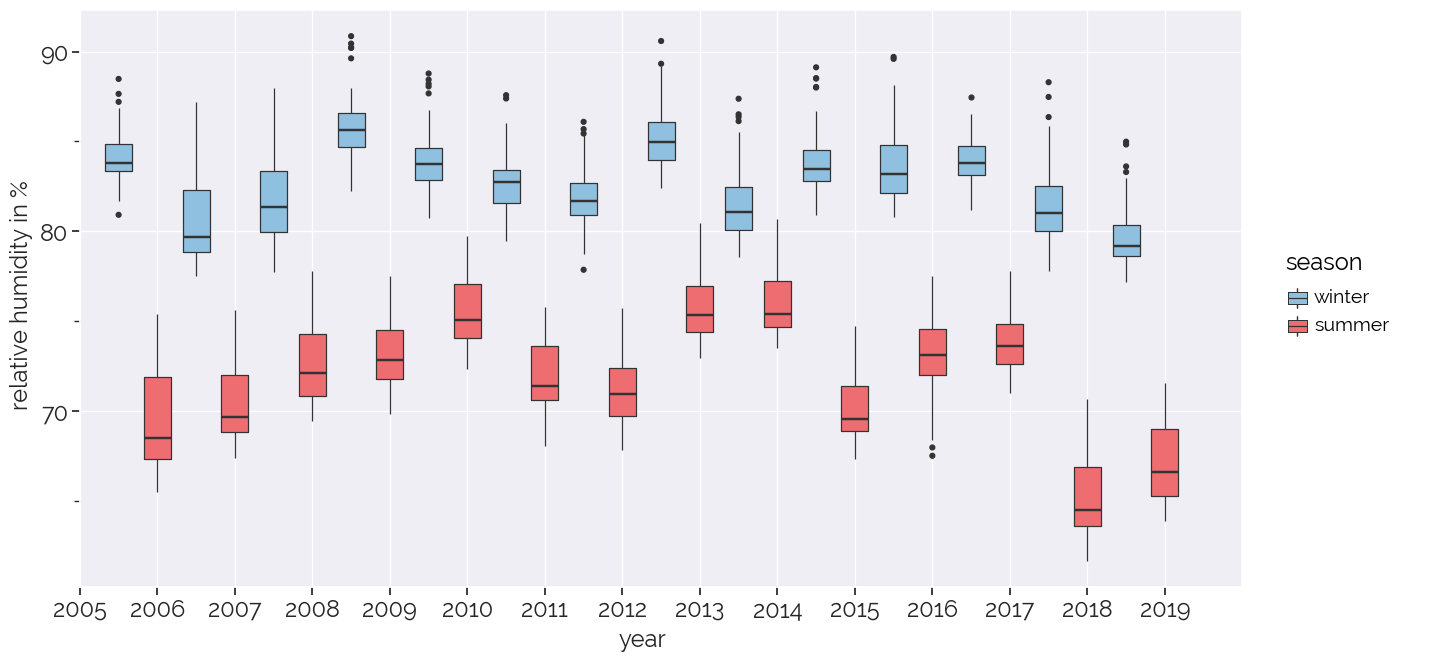

In [28]:
climate_boxplot('RF0', 'mean') # relative humidity

Since the correlation between humidity and corrected waterbalance was already established, it is not surprising that this plot reinforces what was the previous insights.

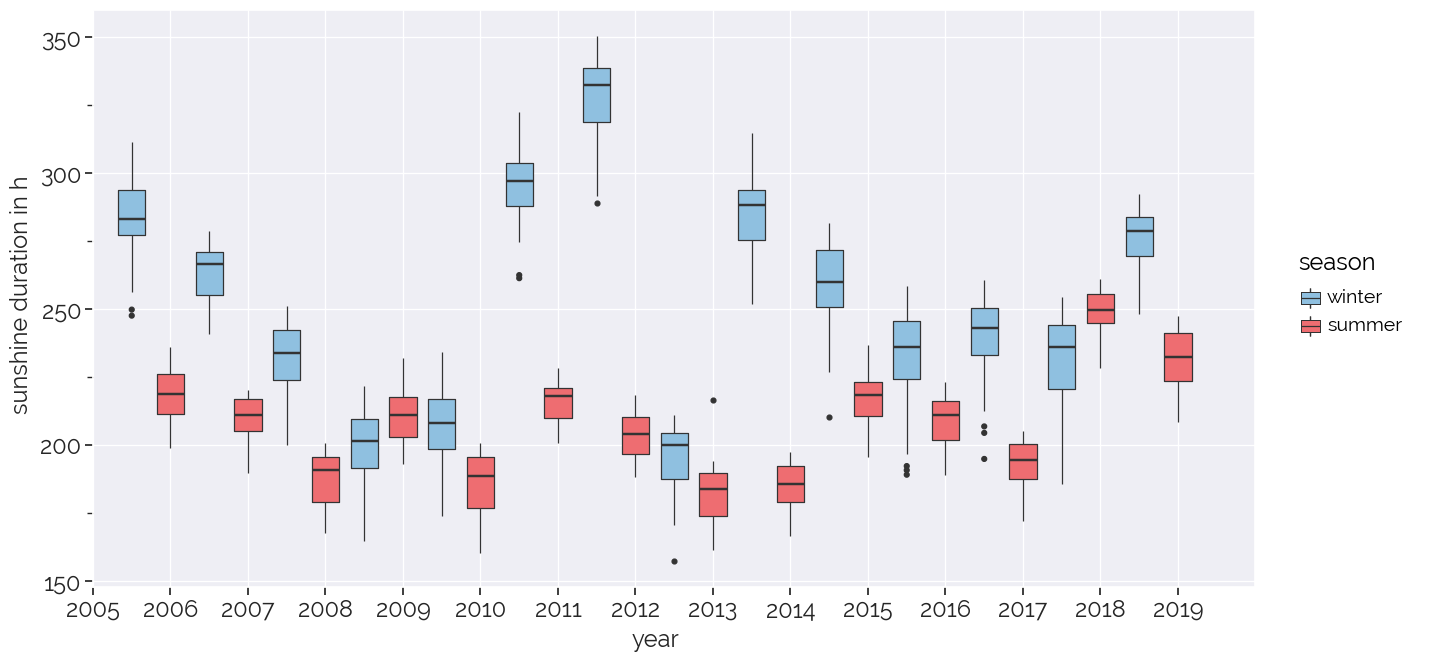

In [29]:
climate_boxplot('SD0', 'mean') # total sunshine duration

For the sunshine duration, the sheer value difference between the years (especially winters) is remarkable. Aside from that, the winters of years 2011 and 2012, which had among the lowest infestation area featured prominently. For the summers, again, 2018 and 2019 are prominently featured as outliers, while 2010 had a rather low sunshine duration (but not the lowest).

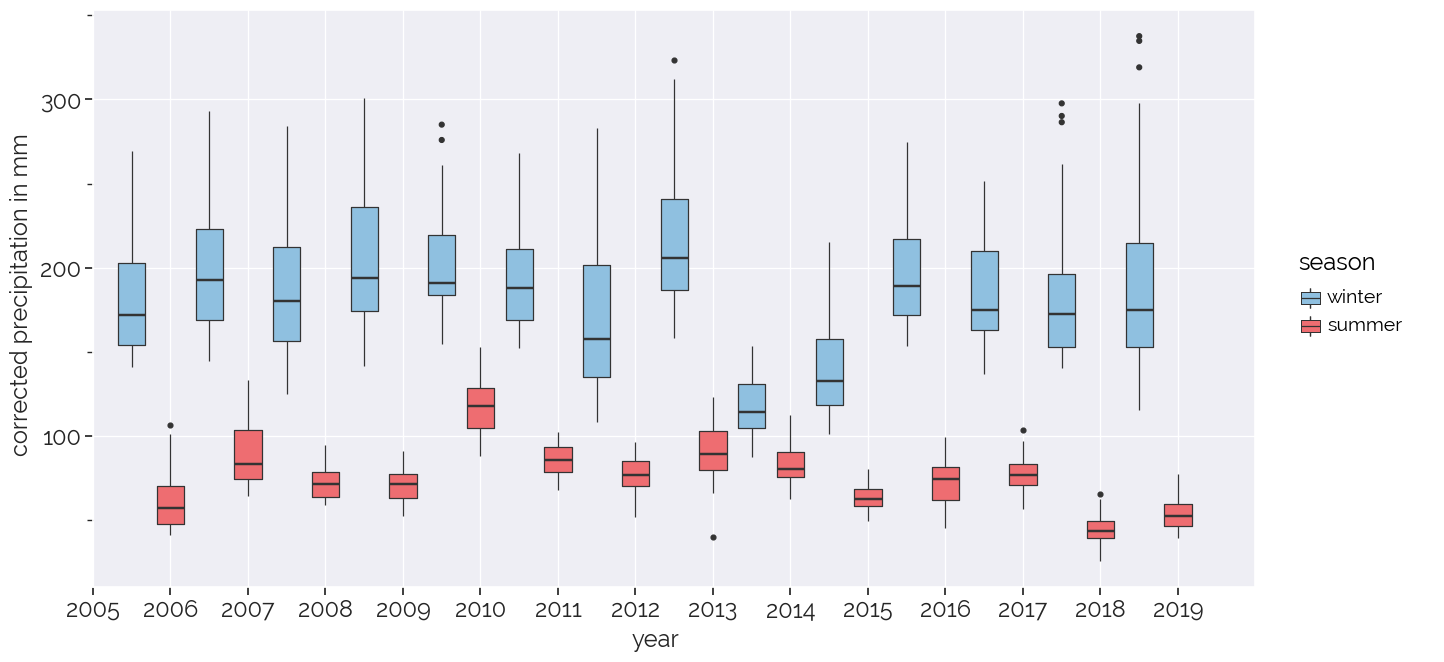

In [30]:
climate_boxplot('RRK', 'mean') # precipitation

Since the waterbalance, of which precipitation is a meaningful component, was already examined, it is not surprising that this plot reinforces the established insights.

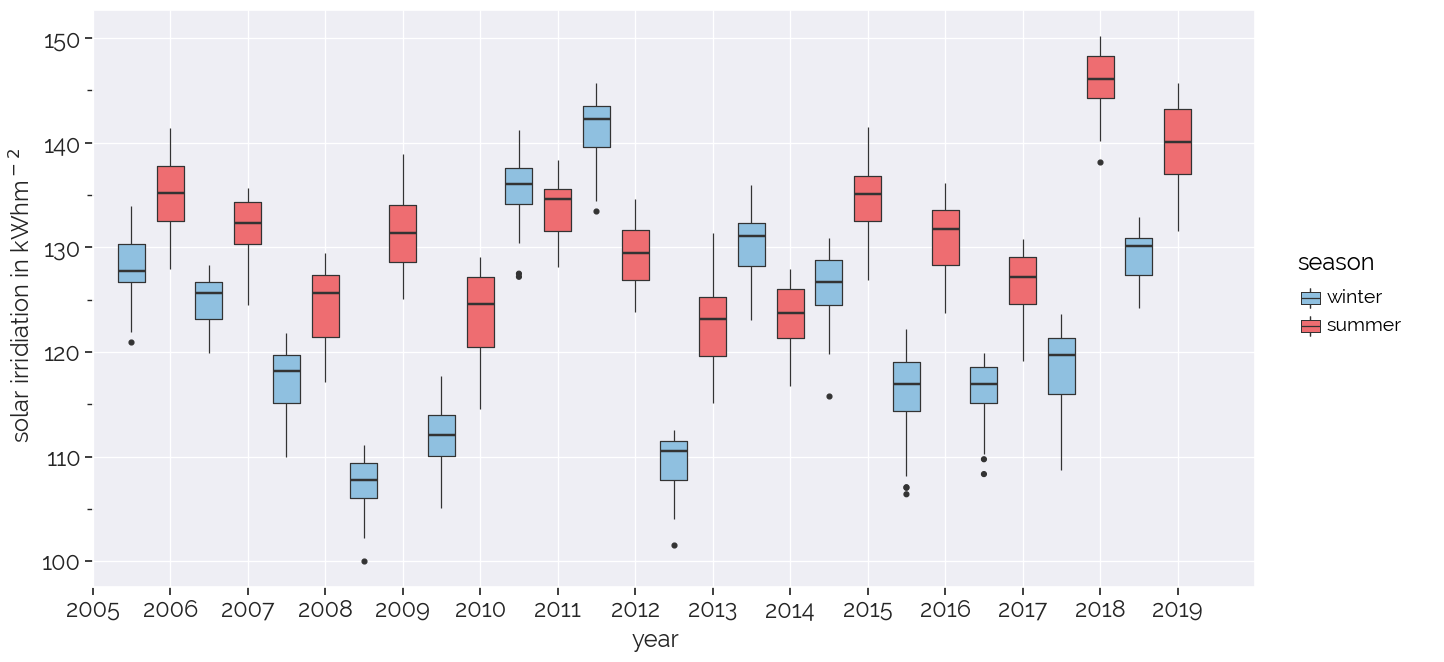

In [31]:
climate_boxplot('RGK', 'mean') # global solar irridiation

Qualitatively, this plot mirrors that of the sunshine duration, which is sensible considering the clore relation of these paramters. The only major difference is that the absolute values of the summers are higher, because there is generally more irridiation per hour of sunshine in summer than there is in winter. 

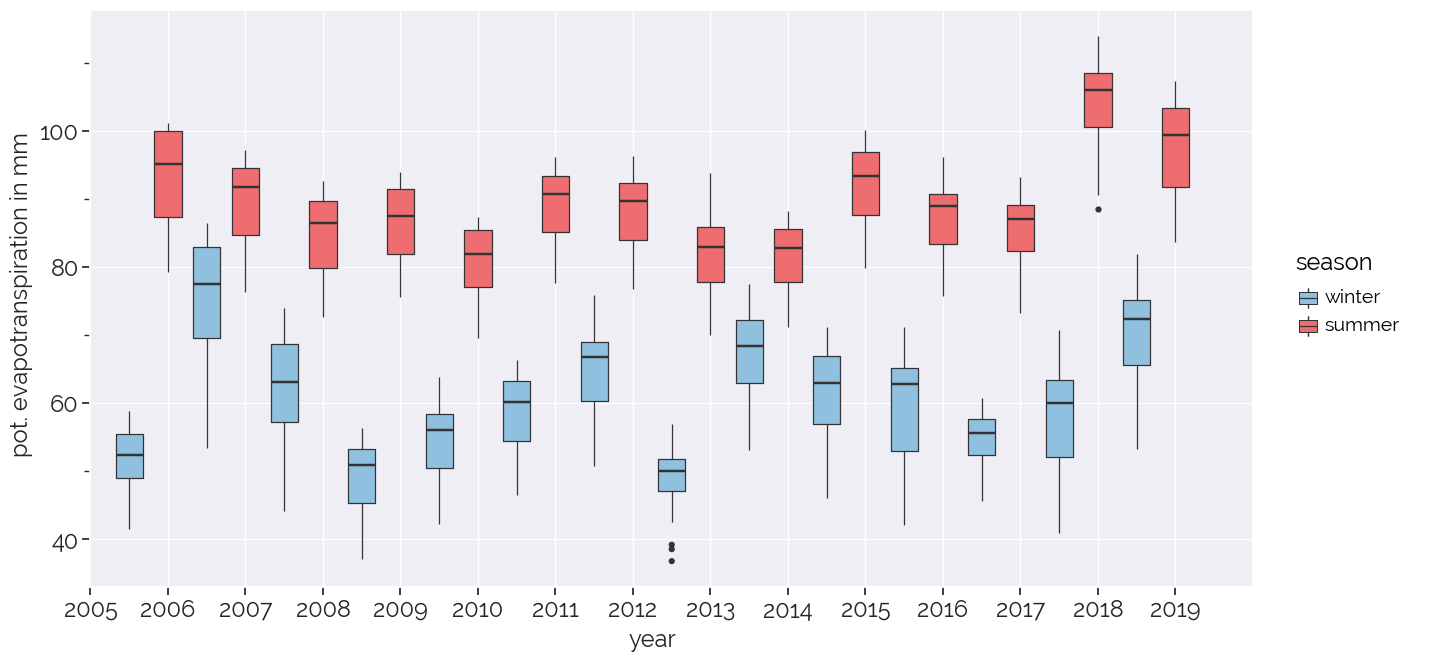

In [32]:
climate_boxplot('GRV', 'mean') # potential evapotranspiration

Since the waterbalance, of which evapotranspiration is a meaningful component, was already examined, it is not surprising that this plot reinforces the established insights. All in all, many chronological boxplots show similar results. 

After reviewing these plots, the separation by summer and winter does seem like a good practise, since the seasons often show dissimilar variable values. To improve the original scatterplots, it would also be of use to look at the climate history, not just at the singular climate value for the respective observation. This way, subsequent dry months would be valued differently than just a single dry month among humid ones. One way of doing this is to look at the rolling mean. Hence, the next iteration of correlation scatter plots for the relationships between target variable and climate parameters will feature the rolling summer values for the features.

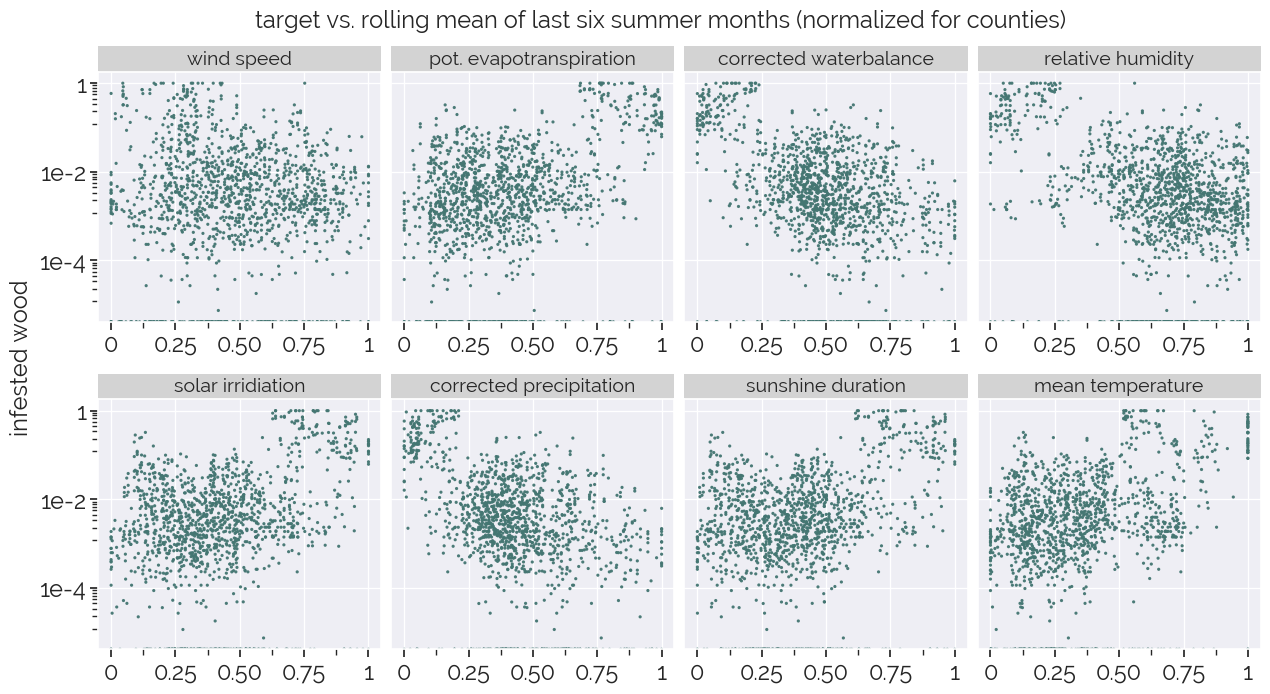

In [34]:
# third graphic - rolling mean of summer months, grouped for counties

# make new labeller function
def mylabeller_rollsr(var):
    label_dict = {
        'FFB_rollsr': 'wind speed',
        'GRV_rollsr': 'pot. evapotranspiration',
        'KWK_rollsr': 'corrected waterbalance',
        'RF0_rollsr': 'relative humidity',
        'RGK_rollsr': 'solar irridiation',
        'RRK_rollsr': 'corrected precipitation',
        'SD0_rollsr': 'sunshine duration',
        'TM0_rollsr': 'mean temperature',
    }
    return label_dict.get(var)

# use a copied dataframe so transformations aren't applied to main dataset
# only take into account years with target variable observations
draw = data[(data['year'].isin(range(2006,2020)))].copy()
draw['infested_wood'] = draw.groupby(
    ['county_name', 'timestamp']
)['infested_wood'].transform('sum')


for v in ['TM0_rollsr', 'RF0_rollsr', 'SD0_rollsr', 'RRK_rollsr', 
          'FFB_rollsr', 'RGK_rollsr', 'GRV_rollsr', 'KWK_rollsr']:
    
    # multiply all values by forestry district area (weight)
    draw[v] = draw[v] * draw['area_fdist']
    
    # sum up weighted target variable 
    draw[v] = draw.groupby(['county_name', 'timestamp'])[v].transform('sum')
    
    # sum up all forestry district areas in respective counties
    draw['area_county'] = draw.groupby(['county_name', 'timestamp'])[
        'area_fdist'
    ].transform('sum')
  
    # technically area_county has the area multiplied by 2
    # since there are two observations per forestry district
    # (non-state- and state-owned forest)
    #
    # the same is true for the target variable however so for the 
    # fraction this does not matter
    draw[v] = draw[[v, 'area_county']].apply(lambda x: x[0]/x[1], axis=1)
    
    # normalize target variable with minmax scaler for county
    draw[v] = draw.groupby('county_name')[v].transform(
        lambda x: minmax_scale(x)
    )
    
# drop duplicates    
draw.drop_duplicates(['county_name', 'timestamp'], inplace=True)
draw['infested_wood'] = draw.groupby('county_name')[
    'infested_wood'
].transform(lambda x: minmax_scale(x))

for v in ['TM0_rollsr', 'RF0_rollsr', 'SD0_rollsr', 'RRK_rollsr', 
          'FFB_rollsr', 'RGK_rollsr', 'GRV_rollsr', 'KWK_rollsr']:
    # normalize features with minmax scake for county
    draw[v] = draw.groupby(['county_name'])[v].transform(
        lambda x: minmax_scale(x)
    )
    
# transform from wide to long format as plotnine likes tidy data
draw = pd.melt(
    draw, id_vars=['infested_wood'],
    value_vars=['TM0_rollsr', 'RF0_rollsr', 'SD0_rollsr', 'RRK_rollsr', 
                'FFB_rollsr', 'RGK_rollsr', 'GRV_rollsr', 'KWK_rollsr']
)

# plot
(p9.ggplot(p9.aes('value', 'infested_wood'), data=draw)
 + p9.geom_point(size=.3, alpha=.9, color=mycolors[0])
 + p9.facet_wrap('variable', scales='free_x', 
                 ncol=4, labeller=mylabeller_rollsr)
 + p9.scale_y_log10()
 + p9.ggtitle(
     'target vs. rolling mean of last '
     'six summer months (normalized for counties)'
 )
 + p9.xlab('') + p9.ylab('infested wood')
 + mythemewide
).draw();

This plot finally shows a slight correlation between target variable and climate features. By using the rolling mean for summer values, the observations of the critical years stand out in their own section of the plot. As a result, a weak relationship with the infested wood is apparent. The data shows that a few weeks of warm/dry weather does not immediately result in a higher amount of infested wood. It is the perpetual heat and dryness that contributes to the scope of the infestation. This is in line with the knowledge on spruce and beetle biology, as healthy spruce trees defend themselves against bark beetles by relesasing a sap or resin with insecticidal compounds when the beetles try to drill into their bark. Without the necessary water, the trees defense system is weakend, resulting in a mass vulnerability of spruce trees.

In the last of the climate parameter plots, a similar approach is taken. This time, the values are aggregated for each year.

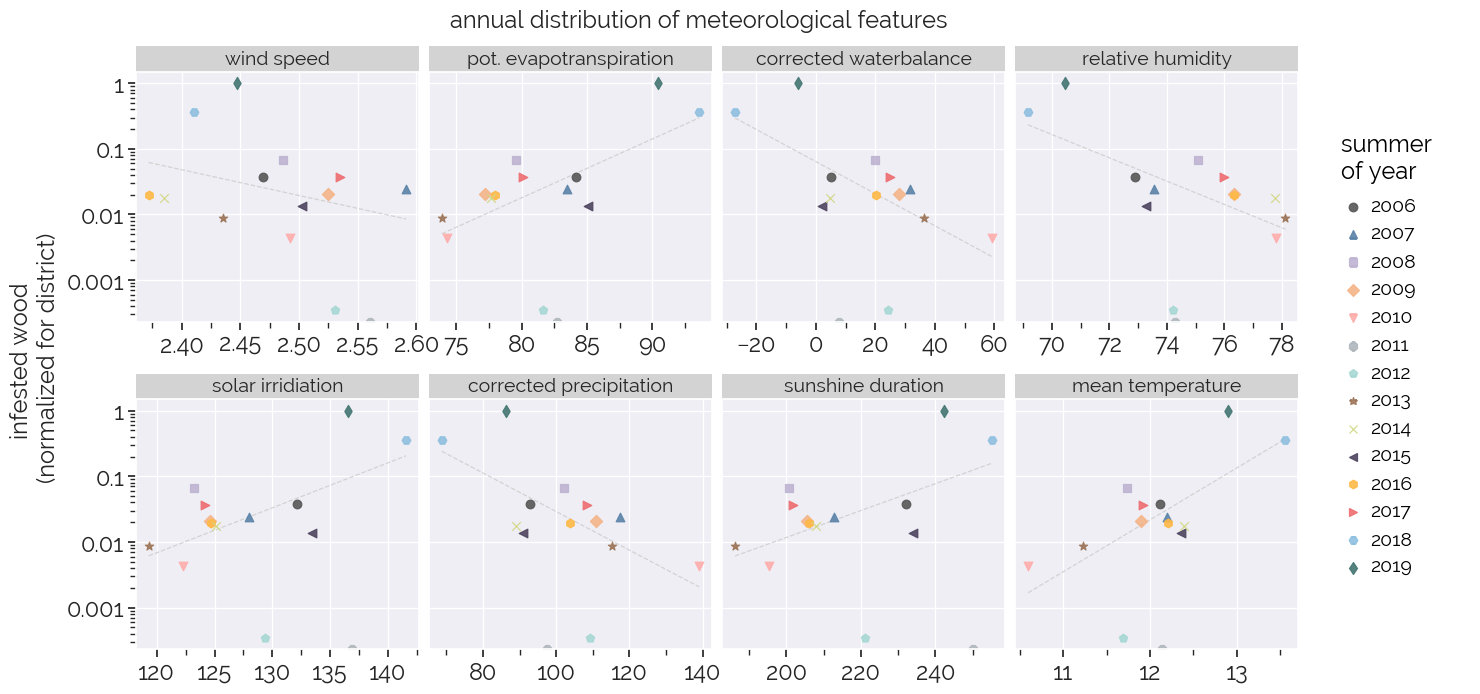

In [38]:
# fourth graphic - only one dot per year (whole year, not just summer)

# use a copied dataframe so transformations aren't applied to main dataset
# only take into account years with target variable observations
draw = data[(data['year'].isin(range(2006,2020)))].copy()
draw['infested_wood'] = draw.groupby(['year'])[
    'infested_wood'
].transform('mean')

for v in ['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK']:
    draw[v] = draw.groupby(['year'])[v].transform('mean')
    
# drop duplicates    
draw.drop_duplicates(['year'], inplace=True)

# minmax scale
draw['infested_wood'] = draw['infested_wood'].transform(
    lambda x: minmax_scale(x)
)

# transform from wide to long format as plotnine likes tidy data
draw = pd.melt(
    draw, id_vars=['infested_wood', 'year'], 
    value_vars=['TM0', 'RF0', 'SD0', 'RRK', 'FFB', 'RGK', 'GRV', 'KWK']
)

# plot
(p9.ggplot(
    p9.aes('value', 'infested_wood', 
           color='factor(year)', shape='factor(year)'), 
    data=draw
)
 + p9.geom_smooth(p9.aes(group=1),
     method='lm', se=False, color='lightgrey', size=.5, linetype='--')
 + p9.geom_point(size=3, alpha=.9)
 + p9.facet_wrap('variable', scales='free_x', 
                 ncol=4, labeller=mylabeller_names)
 + p9.ggtitle('annual target vs. mean of meteorological features')
 + p9.xlab('') + p9.ylab('infested wood \n(normalized for district)') 
 + p9.scale_y_log10()
 + p9.scale_color_manual(mycolors[:14][::-1], name='summer \nof year')
 + p9.scale_shape_manual([ 
    'o',  # circle
    '^',  # triangle up
    's',  # square
    'D',  # Diamond
    'v',  # triangle down
    '8',  # octagon
    'p',  # pentagon
    '*',  # star
    'x',  # x
    '<',  # triangle left
    'h',  # hexagon1
    '>',  # triangle right
    'H',  # hexagon1
    'd'   # thin diamond
 ], name='summer \nof year')
 + mythemewide
).draw();

This plot also captures the relationships seen in the last plot. The years 2018 and 2019 are always on the top-left or top-right corner of the plot. Noticeably the year 2008 (third largest amount of infested wood) is still mostly in the center of the plots and not an outlier for these features in any way. -->It is presumed that the high amount of infested wood in this year is maybe not caused by climate variation, but instead by another feature, such as demolition wood.

# Other

In [ ]:
draw = data[(data['year'].isin(range(2006,2020)))].copy()

draw = pd.DataFrame(draw.groupby(['year', 'timeframe'])['infested_wood'].median()).reset_index()
    
(p9.ggplot(p9.aes('timeframe', 'infested_wood', fill='factor(year)'), data=draw)
 + p9.geom_col(alpha=1, color='black', width=.7, size=.3)
 + p9.scale_x_discrete(labels=[r'$\Sigma$ Jan - Mar', 'April', 'May', 'June', 'July', 'August', 'September', r'$\Sigma$ Oct - Dec'])
 + p9.scale_fill_manual(mycolors[:14][::-1], name='year')
 + p9.ggtitle('target variable vs. observation timeframes')
 + p9.xlab('') + p9.ylab(r'infested wood in solid m$^3$')
 + mythemewide
).draw();

Pearson Corellation would not make sense since no normal distribution of target

In [ ]:
(p9.ggplot(p9.aes('prev_infested_wood', 'infested_wood'), data=data)
 + p9.geom_point()
 + p9.theme_seaborn()
).draw();

In [ ]:
draw = pd.DataFrame(data.groupby('endangered_forest_density')['infested_wood'].mean().reset_index())

(p9.ggplot(p9.aes('endangered_forest_density', 'infested_wood'), data=draw)
 + p9.geom_point()
 + p9.theme_seaborn()
).draw();

In [ ]:
draw = data.groupby(['year','demolition_wood'])[['demolition_wood','infested_wood']].mean()

(p9.ggplot(p9.aes('demolition_wood', 'infested_wood'), data=draw)
 + p9.geom_point()
 + mytheme
).draw();